## Atividade avaliativa final de python

#### Aluno : Yago David Pimenta   RA : 800273

#### 1 -

In [1]:
import io, requests
import pandas as pd, matplotlib.pyplot as plt
from bs4 import BeautifulSoup


with io.StringIO() as csv:
  data_url \
    = "https://docs.google.com/uc?export=download&id=1GLngCo_qP1H_SfOjrGk6eaABciTLOSBU"
  data = requests.get(data_url).text
  csv.write(data)
  csv.seek(0)
  dataframe = pd.read_csv(csv)


pd.set_option('display.expand_frame_repr', False)

In [2]:
dataframe.head()

,Series_reference,Period,Data_value,Suppressed,STATUS,UNITS,Magnitude,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,BDCQ.SEA1AA,2011.06,80078.0,NaN,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,NaN,NaN
1,BDCQ.SEA1AA,2011.09,78324.0,NaN,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,NaN,NaN
2,BDCQ.SEA1AA,2011.12,85850.0,NaN,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,NaN,NaN
3,BDCQ.SEA1AA,2012.03,90743.0,NaN,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,NaN,NaN
4,BDCQ.SEA1AA,2012.06,81780.0,NaN,F,Number,0,Business Data Collection - BDC,Industry by employment variable,Filled jobs,"Agriculture, Forestry and Fishing",Actual,NaN,NaN


#### Perguntas

1)- Com relação ao dataframe obtido, realize as seguintes operações:

a)- Remova a coluna 'Series_reference'.

b)- Exiba os tipos das colunas restantes.

c)- Exiba o número de entradas no dataframe.

d)- Exiba todos os diferentes períodos (coluna 'Period') presentes no dataframe (sem repetir).

e)- Crie uma variável que contenha um novo dataframe (ou series), que contenha apenas os items do dataframe original onde a coluna 'Series_title_1' seja do tipo 'Total earnings'.

f)- Para cada tipo de Series_title_1, calcule quais períodos possuem o maior Data_value total (soma).


#### Respostas

a)

In [3]:
dataframe = dataframe.drop(columns=['Series_reference'])

b)

In [4]:
dataframe.columns

Index(['Period', 'Data_value', 'Suppressed', 'STATUS', 'UNITS', 'Magnitude',
       'Subject', 'Group', 'Series_title_1', 'Series_title_2',
       'Series_title_3', 'Series_title_4', 'Series_title_5'],
      dtype='object')

c)

In [5]:
dataframe.shape[0]

20641

d)

In [6]:
periodos_unicos = dataframe['Period'].unique()
for period in periodos_unicos:
    print(period)

2011.06
2011.09
2011.12
2012.03
2012.06
2012.09
2012.12
2013.03
2013.06
2013.09
2013.12
2014.03
2014.06
2014.09
2014.12
2015.03
2015.06
2015.09
2015.12
2016.03
2016.06
2016.09
2016.12
2017.03
2017.06
2017.09
2017.12
2018.03
2018.06
2018.09
2018.12
2019.03
2019.06
2019.09
2019.12
2020.03
2020.06
2020.09
2020.12
2021.03
2021.06
2021.09
2021.12
2022.03
2022.06
2022.09


e)

In [7]:
df = dataframe[dataframe['Series_title_1'] == 'Total earnings']


f)

In [8]:
df1 = dataframe.groupby(['Series_title_1', 'Period'])['Data_value'].sum().reset_index()


max_idx = df1.groupby('Series_title_1')['Data_value'].idxmax()


resultado = df1.loc[max_idx]
resultado

,Series_title_1,Period,Data_value
45,Filled jobs,2022.09,1.974498e+07
88,Filled jobs (workplace location based),2021.12,4.389393e+06
137,Total earnings,2022.09,2.348882e+05


#### 2 -

In [9]:
filled_jobs_per_period_by_area = dataframe[(dataframe['Series_title_1'] == 'Filled jobs') & \
  (dataframe['Group'] == 'Industry by employment variable')]


filled_jobs_per_period_by_area \
   = filled_jobs_per_period_by_area[['Series_title_2', 'Period', 'Data_value']]


area_data_list = [d.sort_values('Period')\
                  .dropna(axis=0)\
                  .drop(['Series_title_2', 'Period'], axis=1)\
                  .values.tolist() for _, d in \
  filled_jobs_per_period_by_area.groupby(['Series_title_2'])]


area_data_list_final = []
for i, area_data in enumerate(area_data_list):
  area_data_list_final.append([0.0] * (int(len(area_data) / 2)))
  data_pairs = enumerate(zip(*[iter(area_data)]*2))
  for j, (month_start, month_end) in data_pairs:
    area_data_list_final[i][j] = month_end[0] - month_start[0]


area_labels_final = filled_jobs_per_period_by_area['Series_title_2'].unique()


x_axis = range(len(area_data_list_final[0]))
nlabels = len(area_labels_final)

<ipython-input-9-c00fd0fab07d>:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  area_data_list = [d.sort_values('Period')\


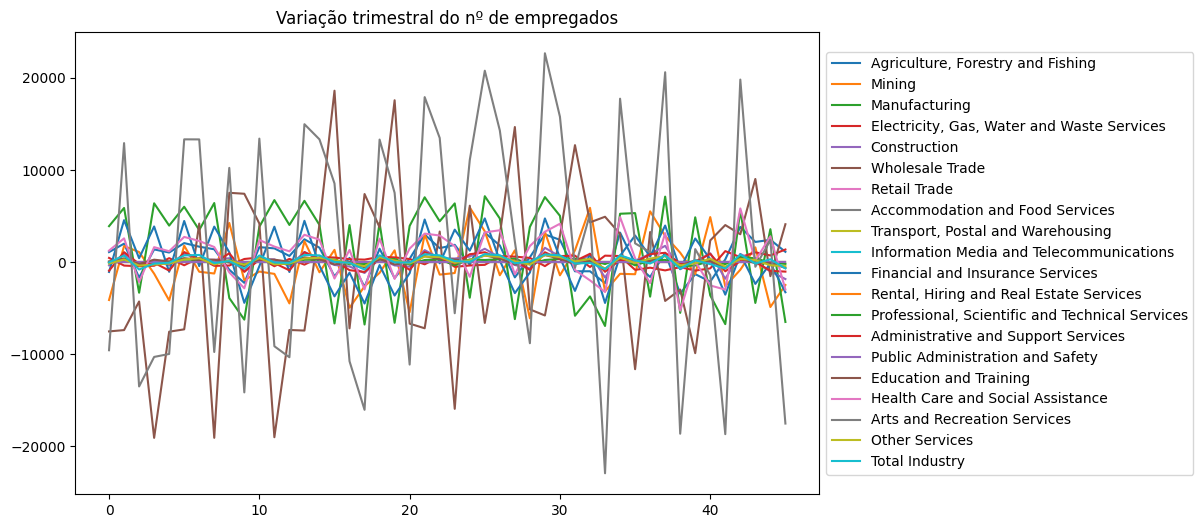

In [10]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 1, 1)

for i in range(nlabels):
    plt.plot(x_axis, area_data_list_final[i], label=area_labels_final[i])

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.set_title('Variação trimestral do nº de empregados')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


#### 3)

In [34]:
from bs4 import BeautifulSoup

html_content = """
<div id="questions" class=" flush-left">




<div id="question-summary-76986628" class="s-post-summary    js-post-summary" data-post-id="76986628" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="14 views">
            <span class="s-post-summary--stats-item-number">14</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76986628/how-can-i-generate-the-vendor-folder-with-composer-in-a-docker-container-and-h" class="s-link">How can I generate the vendor folder (with composer) in a docker container and have it available in my host?</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I am trying to set a docker system with 4 services (nginx server, api, mariadb, frontend). Almost everything is working well, however, for efficiency reasons, I would like to generate the vendor ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-docker t-nginx t-docker-compose t-dockerfile t-composer-php">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/docker" class="post-tag flex--item mt0 js-tagname-docker" title="show questions tagged 'docker'" aria-label="show questions tagged 'docker'" rel="tag" aria-labelledby="tag-docker-tooltip-container">docker</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/nginx" class="post-tag flex--item mt0 js-tagname-nginx" title="show questions tagged 'nginx'" aria-label="show questions tagged 'nginx'" rel="tag" aria-labelledby="tag-nginx-tooltip-container">nginx</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/docker-compose" class="post-tag flex--item mt0 js-tagname-docker-compose" title="show questions tagged 'docker-compose'" aria-label="show questions tagged 'docker-compose'" rel="tag" aria-labelledby="tag-docker-compose-tooltip-container">docker-compose</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/dockerfile" class="post-tag flex--item mt0 js-tagname-dockerfile" title="show questions tagged 'dockerfile'" aria-label="show questions tagged 'dockerfile'" rel="tag" aria-labelledby="tag-dockerfile-tooltip-container">dockerfile</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/composer-php" class="post-tag flex--item mt0 js-tagname-composer-php" title="show questions tagged 'composer-php'" aria-label="show questions tagged 'composer-php'" rel="tag" aria-labelledby="tag-composer-php-tooltip-container">composer-php</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/214143/jason-aller" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="214143">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/61025b3df4700620a5d9099293f23a5d?s=32&amp;d=identicon&amp;r=PG" alt="Jason Aller's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/214143/jason-aller" class="flex--item">Jason Aller</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">3,541</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76986628/how-can-i-generate-the-vendor-folder-with-composer-in-a-docker-container-and-h" class="s-link s-link__muted">modified <span title="2023-08-27 16:27:54Z" class="relativetime">50 secs ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76986752" class="s-post-summary    js-post-summary" data-post-id="76986752" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers has-accepted-answer" title="one of the answers was accepted as the correct answer">
<svg aria-hidden="true" class="svg-icon iconCheckmarkSm" width="14" height="14" viewBox="0 0 14 14"><path d="M13 3.41 11.59 2 5 8.59 2.41 6 1 7.41l4 4 8-8Z"></path></svg>            <span class="s-post-summary--stats-item-number">2</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="38 views">
            <span class="s-post-summary--stats-item-number">38</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76986752/how-to-show-datetime-now-into-input-box" class="s-link">How to show DateTime.Now into Input Box</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I am using ASP.Net Core 7.0 and tried to show DateTime.Now into Input box but did not show anything when the page was loaded.
See below all my codes.
Model
public class DateShowVM
{
   [DataType(...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-aspûnet-core">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/asp.net-core" class="post-tag flex--item mt0 js-tagname-aspûnet-core" title="show questions tagged 'asp.net-core'" aria-label="show questions tagged 'asp.net-core'" rel="tag" aria-labelledby="tag-asp.net-core-tooltip-container">asp.net-core</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/13302/marc-s" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="13302">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/b4779212f57ff2e9549ea90a4499c2d7?s=32&amp;d=identicon&amp;r=PG" alt="marc_s's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/13302/marc-s" class="flex--item">marc_s</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score 732,329" dir="ltr">732k</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76986752/how-to-show-datetime-now-into-input-box?lastactivity" class="s-link s-link__muted">modified <span title="2023-08-27 16:27:32Z" class="relativetime">1 min ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987991" class="s-post-summary    js-post-summary" data-post-id="76987991" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="3 views">
            <span class="s-post-summary--stats-item-number">3</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987991/i-got-a-nosuchelementexception-error-when-i-ran-this-script-on-github-actions" class="s-link">I got a 'NoSuchElementException' error when I ran this script on GitHub Actions</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I encountered an error when running the script on GitHub Actions, but it worked fine when I ran the same script on my local system
'''
@Test
public void update() throws IOException, ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-selenium-webdriver t-github-actions">
<a class="themed subcommunity-topic-avatar subcommunity-topic-ci-cd s-avatar s-avatar__24 mr2 va-text-top js-community-tag d-inline-block mtn4 sm:mtn6 mb2" style="" data-controller="s-tooltip" href="/collectives/ci-cd" aria-describedby="--stacks-s-tooltip-hebj87sn"></a><div id="--stacks-s-tooltip-hebj87sn" class="s-popover s-popover__tooltip" role="tooltip">CI/CD Collective<div class="s-popover--arrow"></div></div>
<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/selenium-webdriver" class="post-tag flex--item mt0 js-tagname-selenium-webdriver" title="show questions tagged 'selenium-webdriver'" aria-label="show questions tagged 'selenium-webdriver'" rel="tag" aria-labelledby="tag-selenium-webdriver-tooltip-container">selenium-webdriver</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/github-actions" class="post-tag flex--item mt0 js-tagname-github-actions" title="show questions tagged 'github-actions'" aria-label="show questions tagged 'github-actions'" rel="tag" aria-labelledby="tag-github-actions-tooltip-container">github-actions</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/11082516/monu-singh" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="11082516">        <div class="gravatar-wrapper-16">
            <img src="https://lh4.googleusercontent.com/-gq8SPIQOndY/AAAAAAAAAAI/AAAAAAAAAAA/ACevoQN54T7OknLuORw6_FTnD5E06I46cA/mo/photo.jpg?sz=32" alt="Monu Singh's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/11082516/monu-singh" class="flex--item">Monu Singh</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">31</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987991/i-got-a-nosuchelementexception-error-when-i-ran-this-script-on-github-actions" class="s-link s-link__muted">asked <span title="2023-08-27 16:27:22Z" class="relativetime">1 min ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76983236" class="s-post-summary    js-post-summary" data-post-id="76983236" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers " title="1 answer">
            <span class="s-post-summary--stats-item-number">1</span>
            <span class="s-post-summary--stats-item-unit">answer</span>
        </div>
        <div class="s-post-summary--stats-item " title="6 views">
            <span class="s-post-summary--stats-item-number">6</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76983236/how-to-run-a-jar-output-from-dex2jar" class="s-link">How to run a .jar output from dex2jar?</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I just decompiled an .apk file to .jar using dex2jar. However, I cannot execute the output file.
Instead I get the error: "Invalid or corrupt jarfile"
I tried dex2jar 2.0 and 2.1 and I'm ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-jar t-apk t-dex2jar">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/jar" class="post-tag flex--item mt0 js-tagname-jar" title="show questions tagged 'jar'" aria-label="show questions tagged 'jar'" rel="tag" aria-labelledby="tag-jar-tooltip-container">jar</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/apk" class="post-tag flex--item mt0 js-tagname-apk" title="show questions tagged 'apk'" aria-label="show questions tagged 'apk'" rel="tag" aria-labelledby="tag-apk-tooltip-container">apk</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/dex2jar" class="post-tag flex--item mt0 js-tagname-dex2jar" title="show questions tagged 'dex2jar'" aria-label="show questions tagged 'dex2jar'" rel="tag" aria-labelledby="tag-dex2jar-tooltip-container">dex2jar</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/150978/robert" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="150978">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/feadc214792e2581c3c750140e3eb2c7?s=32&amp;d=identicon&amp;r=PG" alt="Robert's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/150978/robert" class="flex--item">Robert</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score 39,142" dir="ltr">39.1k</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76983236/how-to-run-a-jar-output-from-dex2jar?lastactivity" class="s-link s-link__muted">answered <span title="2023-08-27 16:27:21Z" class="relativetime">1 min ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987384" class="s-post-summary    js-post-summary" data-post-id="76987384" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers " title="1 answer">
            <span class="s-post-summary--stats-item-number">1</span>
            <span class="s-post-summary--stats-item-unit">answer</span>
        </div>
        <div class="s-post-summary--stats-item " title="9 views">
            <span class="s-post-summary--stats-item-number">9</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987384/jupyter-notebook-does-not-load-variables-from-bash-profile-or-zshrc" class="s-link">Jupyter notebook does not load variables from bash_profile or zshrc</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I am running Jupyter notebook using VSCode. In order to run rpy2, I have to insert the following code in my notebook:
import os
os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Resources/'

I ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-python t-bash t-jupyter-notebook t-environment-variables">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/python" class="post-tag flex--item mt0 js-tagname-python" title="show questions tagged 'python'" aria-label="show questions tagged 'python'" rel="tag" aria-labelledby="tag-python-tooltip-container">python</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/bash" class="post-tag flex--item mt0 js-tagname-bash" title="show questions tagged 'bash'" aria-label="show questions tagged 'bash'" rel="tag" aria-labelledby="tag-bash-tooltip-container">bash</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/jupyter-notebook" class="post-tag flex--item mt0 js-tagname-jupyter-notebook" title="show questions tagged 'jupyter-notebook'" aria-label="show questions tagged 'jupyter-notebook'" rel="tag" aria-labelledby="tag-jupyter-notebook-tooltip-container">jupyter-notebook</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/environment-variables" class="post-tag flex--item mt0 js-tagname-environment-variables" title="show questions tagged 'environment-variables'" aria-label="show questions tagged 'environment-variables'" rel="tag" aria-labelledby="tag-environment-variables-tooltip-container">environment-variables</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/252518/freeman" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="252518">        <div class="gravatar-wrapper-16">
            <img src="https://i.stack.imgur.com/3FDkH.jpg?s=32&amp;g=1" alt="Freeman's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/252518/freeman" class="flex--item">Freeman</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">9,324</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987384/jupyter-notebook-does-not-load-variables-from-bash-profile-or-zshrc?lastactivity" class="s-link s-link__muted">answered <span title="2023-08-27 16:27:19Z" class="relativetime">1 min ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987988" class="s-post-summary    js-post-summary" data-post-id="76987988" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="3 views">
            <span class="s-post-summary--stats-item-number">3</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987988/why-can-i-not-use-firebaseauth-mauth" class="s-link">why can i not use FirebaseAuth mAuth</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                What I'm trying to write is
private FireBaseAuth mAuth;

but it keeps on saying can't resolve my 'FirebsaeAuth' symbol. What I'm trying to make is a budgeting app by the way if that helps
This is my ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-android t-firebase-authentication">
<a class="themed subcommunity-avatar subcommunity-google-cloud s-avatar s-avatar__24 mr2 va-text-top js-community-tag d-inline-block mtn4 sm:mtn6 mb2" style="" data-controller="s-tooltip" href="/collectives/google-cloud" aria-describedby="--stacks-s-tooltip-g2pqfd3l"></a><div id="--stacks-s-tooltip-g2pqfd3l" class="s-popover s-popover__tooltip" role="tooltip">Google Cloud Collective<div class="s-popover--arrow"></div></div>
<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/android" class="post-tag flex--item mt0 js-tagname-android" title="show questions tagged 'android'" aria-label="show questions tagged 'android'" rel="tag" aria-labelledby="tag-android-tooltip-container">android</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/firebase-authentication" class="post-tag flex--item mt0 js-tagname-firebase-authentication" title="show questions tagged 'firebase-authentication'" aria-label="show questions tagged 'firebase-authentication'" rel="tag" aria-labelledby="tag-firebase-authentication-tooltip-container">firebase-authentication</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/18495283/nabil-aiman" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="18495283">        <div class="gravatar-wrapper-16">
            <img src="https://lh3.googleusercontent.com/a-/AOh14GhJUIeS8r0P8Z34ubwSuXijfGeE9KSK5BHURA2-zw=k-s32" alt="Nabil Aiman's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/18495283/nabil-aiman" class="flex--item">Nabil Aiman</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">1</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987988/why-can-i-not-use-firebaseauth-mauth" class="s-link s-link__muted">asked <span title="2023-08-27 16:27:17Z" class="relativetime">1 min ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76983192" class="s-post-summary    js-post-summary" data-post-id="76983192" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="15 views">
            <span class="s-post-summary--stats-item-number">15</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76983192/django-membership-model-registration" class="s-link">Django Membership model registration</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                i have some issues with the following code.
I have an authentication system that works fine.
After user registers the account, django send a email with token for account confirmation.
it works fine.
...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-django t-membership t-django-paypal">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/django" class="post-tag flex--item mt0 js-tagname-django" title="show questions tagged 'django'" aria-label="show questions tagged 'django'" rel="tag" aria-labelledby="tag-django-tooltip-container">django</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/membership" class="post-tag flex--item mt0 js-tagname-membership" title="show questions tagged 'membership'" aria-label="show questions tagged 'membership'" rel="tag" aria-labelledby="tag-membership-tooltip-container">membership</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/django-paypal" class="post-tag flex--item mt0 js-tagname-django-paypal" title="show questions tagged 'django-paypal'" aria-label="show questions tagged 'django-paypal'" rel="tag" aria-labelledby="tag-django-paypal-tooltip-container">django-paypal</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/21234197/steve" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="21234197">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/7dcfd5b1a173108b71583c4c20dbdba8?s=32&amp;d=identicon&amp;r=PG" alt="Steve's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/21234197/steve" class="flex--item">Steve</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">21</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76983192/django-membership-model-registration" class="s-link s-link__muted">modified <span title="2023-08-27 16:27:15Z" class="relativetime">1 min ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76985979" class="s-post-summary    js-post-summary" data-post-id="76985979" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers " title="1 answer">
            <span class="s-post-summary--stats-item-number">1</span>
            <span class="s-post-summary--stats-item-unit">answer</span>
        </div>
        <div class="s-post-summary--stats-item " title="24 views">
            <span class="s-post-summary--stats-item-number">24</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76985979/button-issue-in-custom-tkinter" class="s-link">Button Issue in custom tkinter</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                So, I'm making a weather app in python using custom Tkinter library. And there's a little in ctk which shows "CTKButton" in the actual button when I try use CTkimage.
Note that this only ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-python t-tkinter t-customtkinter">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/python" class="post-tag flex--item mt0 js-tagname-python" title="show questions tagged 'python'" aria-label="show questions tagged 'python'" rel="tag" aria-labelledby="tag-python-tooltip-container">python</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/tkinter" class="post-tag flex--item mt0 js-tagname-tkinter" title="show questions tagged 'tkinter'" aria-label="show questions tagged 'tkinter'" rel="tag" aria-labelledby="tag-tkinter-tooltip-container">tkinter</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/customtkinter" class="post-tag flex--item mt0 js-tagname-customtkinter" title="show questions tagged 'customtkinter'" aria-label="show questions tagged 'customtkinter'" rel="tag" aria-labelledby="tag-customtkinter-tooltip-container">customtkinter</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/22253071/anonymous" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="22253071">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/137449e41fe32f787dad2fdcf97b8805?s=32&amp;d=identicon&amp;r=PG&amp;f=y&amp;so-version=2" alt="Anonymous's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/22253071/anonymous" class="flex--item">Anonymous</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">11</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76985979/button-issue-in-custom-tkinter?lastactivity" class="s-link s-link__muted">answered <span title="2023-08-27 16:27:08Z" class="relativetime">1 min ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987828" class="s-post-summary    js-post-summary" data-post-id="76987828" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers " title="1 answer">
            <span class="s-post-summary--stats-item-number">1</span>
            <span class="s-post-summary--stats-item-unit">answer</span>
        </div>
        <div class="s-post-summary--stats-item " title="5 views">
            <span class="s-post-summary--stats-item-number">5</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987828/how-can-i-fix-flutter-attrib" class="s-link">How can I fix flutter attrib</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I downloaded and installed Flutter, I did everything right, but I keep running into a problem.
'attrib' is not recognized as an internal or external command,
operable program or batch file.
FAILURE: ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-android t-flutter">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/android" class="post-tag flex--item mt0 js-tagname-android" title="show questions tagged 'android'" aria-label="show questions tagged 'android'" rel="tag" aria-labelledby="tag-android-tooltip-container">android</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/flutter" class="post-tag flex--item mt0 js-tagname-flutter" title="show questions tagged 'flutter'" aria-label="show questions tagged 'flutter'" rel="tag" aria-labelledby="tag-flutter-tooltip-container">flutter</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/22453015/cfcool100" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="22453015">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/ca2898ab64bf8b4748fb6cc4eaabc11b?s=32&amp;d=identicon&amp;r=PG&amp;f=y&amp;so-version=2" alt="Cfcool100's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/22453015/cfcool100" class="flex--item">Cfcool100</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">1</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987828/how-can-i-fix-flutter-attrib?lastactivity" class="s-link s-link__muted">answered <span title="2023-08-27 16:27:06Z" class="relativetime">1 min ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987985" class="s-post-summary    js-post-summary" data-post-id="76987985" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of -1">
            <span class="s-post-summary--stats-item-number">-1</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="4 views">
            <span class="s-post-summary--stats-item-number">4</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987985/suitable-transformer-or-lstm-architecture-for-multiple-stock-price-prediction-mo" class="s-link">Suitable Transformer or LSTM architecture for multiple stock price prediction model</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I am designing a model to predict the price of a stock for the remainder of the trading day, based on prices from the previous 5 trading days and the prices so far today. The prices are in minute ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-python t-tensorflow t-machine-learning t-keras t-time-series">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/python" class="post-tag flex--item mt0 js-tagname-python" title="show questions tagged 'python'" aria-label="show questions tagged 'python'" rel="tag" aria-labelledby="tag-python-tooltip-container">python</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/tensorflow" class="post-tag flex--item mt0 js-tagname-tensorflow" title="show questions tagged 'tensorflow'" aria-label="show questions tagged 'tensorflow'" rel="tag" aria-labelledby="tag-tensorflow-tooltip-container">tensorflow</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/machine-learning" class="post-tag flex--item mt0 js-tagname-machine-learning" title="show questions tagged 'machine-learning'" aria-label="show questions tagged 'machine-learning'" rel="tag" aria-labelledby="tag-machine-learning-tooltip-container">machine-learning</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/keras" class="post-tag flex--item mt0 js-tagname-keras" title="show questions tagged 'keras'" aria-label="show questions tagged 'keras'" rel="tag" aria-labelledby="tag-keras-tooltip-container">keras</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/time-series" class="post-tag flex--item mt0 js-tagname-time-series" title="show questions tagged 'time-series'" aria-label="show questions tagged 'time-series'" rel="tag" aria-labelledby="tag-time-series-tooltip-container">time-series</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/15065516/shubunkin" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="15065516">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/09a747c34f6aba64339fab43ec79e31b?s=32&amp;d=identicon&amp;r=PG&amp;f=y&amp;so-version=2" alt="shubunkin's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/15065516/shubunkin" class="flex--item">shubunkin</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">1</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987985/suitable-transformer-or-lstm-architecture-for-multiple-stock-price-prediction-mo" class="s-link s-link__muted">asked <span title="2023-08-27 16:27:01Z" class="relativetime">1 min ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987503" class="s-post-summary    js-post-summary" data-post-id="76987503" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers " title="1 answer">
            <span class="s-post-summary--stats-item-number">1</span>
            <span class="s-post-summary--stats-item-unit">answer</span>
        </div>
        <div class="s-post-summary--stats-item " title="14 views">
            <span class="s-post-summary--stats-item-number">14</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987503/arm-microcontroller-loading-raw-binary" class="s-link">ARM microcontroller loading raw binary</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I am learning how bare metal programming on ARM works and I am having difficulties understanding how the addresses defined in the linker script are used.
This is my linker script:
ENTRY(ResetHandler)

...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-arm t-bare-metal t-linker-scripts">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/arm" class="post-tag flex--item mt0 js-tagname-arm" title="show questions tagged 'arm'" aria-label="show questions tagged 'arm'" rel="tag" aria-labelledby="tag-arm-tooltip-container">arm</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/bare-metal" class="post-tag flex--item mt0 js-tagname-bare-metal" title="show questions tagged 'bare-metal'" aria-label="show questions tagged 'bare-metal'" rel="tag" aria-labelledby="tag-bare-metal-tooltip-container">bare-metal</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/linker-scripts" class="post-tag flex--item mt0 js-tagname-linker-scripts" title="show questions tagged 'linker-scripts'" aria-label="show questions tagged 'linker-scripts'" rel="tag" aria-labelledby="tag-linker-scripts-tooltip-container">linker-scripts</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/16007/old-timer" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="16007">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/b612762e247da23cecd7515a14d08863?s=32&amp;d=identicon&amp;r=PG&amp;f=y&amp;so-version=2" alt="old_timer's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/16007/old-timer" class="flex--item">old_timer</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score 69,054" dir="ltr">69.1k</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987503/arm-microcontroller-loading-raw-binary?lastactivity" class="s-link s-link__muted">answered <span title="2023-08-27 16:26:59Z" class="relativetime">1 min ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987927" class="s-post-summary    js-post-summary" data-post-id="76987927" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="6 views">
            <span class="s-post-summary--stats-item-number">6</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987927/the-model-davinci-codex-does-not-exist-or-you-do-not-have-access-to-it" class="s-link">The model `davinci-codex` does not exist or you do not have access to it.',</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I am trying to access the OpenAI API and I have spent a couple of hours reviewing online documentation and there is a lot I am unclear about as I try to resolve the ECONNREFUSED 127.0.0.1:80 error I ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-express t-openai-api t-dotenv">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/express" class="post-tag flex--item mt0 js-tagname-express" title="show questions tagged 'express'" aria-label="show questions tagged 'express'" rel="tag" aria-labelledby="tag-express-tooltip-container">express</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/openai-api" class="post-tag flex--item mt0 js-tagname-openai-api" title="show questions tagged 'openai-api'" aria-label="show questions tagged 'openai-api'" rel="tag" aria-labelledby="tag-openai-api-tooltip-container">openai-api</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/dotenv" class="post-tag flex--item mt0 js-tagname-dotenv" title="show questions tagged 'dotenv'" aria-label="show questions tagged 'dotenv'" rel="tag" aria-labelledby="tag-dotenv-tooltip-container">dotenv</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/6719819/daniel" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="6719819">        <div class="gravatar-wrapper-16">
            <img src="https://i.stack.imgur.com/HmF9I.jpg?s=32&amp;g=1" alt="Daniel's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/6719819/daniel" class="flex--item">Daniel</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score 13,988" dir="ltr">14k</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987927/the-model-davinci-codex-does-not-exist-or-you-do-not-have-access-to-it" class="s-link s-link__muted">modified <span title="2023-08-27 16:26:57Z" class="relativetime">1 min ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76978603" class="s-post-summary    js-post-summary" data-post-id="76978603" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="10 views">
            <span class="s-post-summary--stats-item-number">10</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76978603/realm-react-native-closed-instance" class="s-link">realm react-native closed instance</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I use realm in a react-native app, and I am often facing an error telling me that the realm is closed.
Here is my setup :
// schema.ts
import 'react-native-get-random-values';
import { Realm } from '@...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-react-native t-realm">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/react-native" class="post-tag flex--item mt0 js-tagname-react-native" title="show questions tagged 'react-native'" aria-label="show questions tagged 'react-native'" rel="tag" aria-labelledby="tag-react-native-tooltip-container">react-native</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/realm" class="post-tag flex--item mt0 js-tagname-realm" title="show questions tagged 'realm'" aria-label="show questions tagged 'realm'" rel="tag" aria-labelledby="tag-realm-tooltip-container">realm</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/963107/liohau" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="963107">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/16067238482690fae5b2cce365121633?s=32&amp;d=identicon&amp;r=PG" alt="LiohAu's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/963107/liohau" class="flex--item">LiohAu</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">611</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76978603/realm-react-native-closed-instance" class="s-link s-link__muted">modified <span title="2023-08-27 16:26:48Z" class="relativetime">1 min ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987977" class="s-post-summary    js-post-summary" data-post-id="76987977" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="6 views">
            <span class="s-post-summary--stats-item-number">6</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987977/prometheus-scrapes-metrics-only-from-homecontroller" class="s-link">Prometheus scrapes metrics only from HomeController</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I am trying to implement new metrics in my ASP.NET Core MVC application using .NET 8 and new OpenTelemetry (1.6.0-rc.1).
All works fine except 1 problem - for some reason Prometheus doesnt scrape any ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-aspûnet-core t-prometheus t-open-telemetry t-ûnet-8û0">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/asp.net-core" class="post-tag flex--item mt0 js-tagname-aspûnet-core" title="show questions tagged 'asp.net-core'" aria-label="show questions tagged 'asp.net-core'" rel="tag" aria-labelledby="tag-asp.net-core-tooltip-container">asp.net-core</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/prometheus" class="post-tag flex--item mt0 js-tagname-prometheus" title="show questions tagged 'prometheus'" aria-label="show questions tagged 'prometheus'" rel="tag" aria-labelledby="tag-prometheus-tooltip-container">prometheus</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/open-telemetry" class="post-tag flex--item mt0 js-tagname-open-telemetry" title="show questions tagged 'open-telemetry'" aria-label="show questions tagged 'open-telemetry'" rel="tag" aria-labelledby="tag-open-telemetry-tooltip-container">open-telemetry</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/.net-8.0" class="post-tag flex--item mt0 js-tagname-ûnet-8û0" title="show questions tagged '.net-8.0'" aria-label="show questions tagged '.net-8.0'" rel="tag" aria-labelledby="tag-.net-8.0-tooltip-container">.net-8.0</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/22455544/nikita" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="22455544">        <div class="gravatar-wrapper-16">
            <img src="https://lh3.googleusercontent.com/a/AAcHTtcEhXN2MK9X_vLlIqKUfcGFxYLDoqRDfPZkrT5IO0AK=k-s32" alt="Nikita's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/22455544/nikita" class="flex--item">Nikita</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">1</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987977/prometheus-scrapes-metrics-only-from-homecontroller" class="s-link s-link__muted">modified <span title="2023-08-27 16:26:33Z" class="relativetime">2 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987418" class="s-post-summary    js-post-summary" data-post-id="76987418" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of -2">
            <span class="s-post-summary--stats-item-number">-2</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers has-accepted-answer" title="one of the answers was accepted as the correct answer">
<svg aria-hidden="true" class="svg-icon iconCheckmarkSm" width="14" height="14" viewBox="0 0 14 14"><path d="M13 3.41 11.59 2 5 8.59 2.41 6 1 7.41l4 4 8-8Z"></path></svg>            <span class="s-post-summary--stats-item-number">2</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="30 views">
            <span class="s-post-summary--stats-item-number">30</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987418/how-to-join-2-tables-table-2-data-if-present-in-table-1-that-specific-record-m" class="s-link">How to join 2 tables (Table 2 data if present in Table 1, that specific record must not be selected) in SQL Server</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I have 2 tables, Table1 and Table2. Both tables have only 1 column value.

Table1 - er3, 5ty, 5y6, 72j, 98e, sf1, 3mn, 9w2
Table2 - r5k, ad8, 5ty, sf1, 34x

How can we query, so that we can get the ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-sql t-sql-server t-join t-select t-sql-server-2012">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/sql" class="post-tag flex--item mt0 js-tagname-sql" title="show questions tagged 'sql'" aria-label="show questions tagged 'sql'" rel="tag" aria-labelledby="tag-sql-tooltip-container">sql</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/sql-server" class="post-tag flex--item mt0 js-tagname-sql-server" title="show questions tagged 'sql-server'" aria-label="show questions tagged 'sql-server'" rel="tag" aria-labelledby="tag-sql-server-tooltip-container">sql-server</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/join" class="post-tag flex--item mt0 js-tagname-join" title="show questions tagged 'join'" aria-label="show questions tagged 'join'" rel="tag" aria-labelledby="tag-join-tooltip-container">join</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/select" class="post-tag flex--item mt0 js-tagname-select" title="show questions tagged 'select'" aria-label="show questions tagged 'select'" rel="tag" aria-labelledby="tag-select-tooltip-container">select</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/sql-server-2012" class="post-tag flex--item mt0 js-tagname-sql-server-2012" title="show questions tagged 'sql-server-2012'" aria-label="show questions tagged 'sql-server-2012'" rel="tag" aria-labelledby="tag-sql-server-2012-tooltip-container">sql-server-2012</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/1862889/earth" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="1862889">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/a556ebef10a72fd130b2065777a4c6bf?s=32&amp;d=identicon&amp;r=PG" alt="Earth's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/1862889/earth" class="flex--item">Earth</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">3,473</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987418/how-to-join-2-tables-table-2-data-if-present-in-table-1-that-specific-record-m?lastactivity" class="s-link s-link__muted">modified <span title="2023-08-27 16:26:30Z" class="relativetime">2 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987983" class="s-post-summary    js-post-summary" data-post-id="76987983" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="6 views">
            <span class="s-post-summary--stats-item-number">6</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987983/how-to-get-flexbox-items-to-be-aware-of-their-contents" class="s-link">How to get flexbox items to be aware of their contents</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I have a project that has divs that will contain unknown content, some maybe fixed size, some maybe inline-blocks, some may have width 100%.  I'm using flex-box on the container since I want to the ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-html t-css t-flexbox">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/html" class="post-tag flex--item mt0 js-tagname-html" title="show questions tagged 'html'" aria-label="show questions tagged 'html'" rel="tag" aria-labelledby="tag-html-tooltip-container">html</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/css" class="post-tag flex--item mt0 js-tagname-css" title="show questions tagged 'css'" aria-label="show questions tagged 'css'" rel="tag" aria-labelledby="tag-css-tooltip-container">css</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/flexbox" class="post-tag flex--item mt0 js-tagname-flexbox" title="show questions tagged 'flexbox'" aria-label="show questions tagged 'flexbox'" rel="tag" aria-labelledby="tag-flexbox-tooltip-container">flexbox</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/12860210/spitefulg" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="12860210">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/95153827373f4f08098788588873fed3?s=32&amp;d=identicon&amp;r=PG&amp;f=y&amp;so-version=2" alt="SpitefulG's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/12860210/spitefulg" class="flex--item">SpitefulG</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">61</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987983/how-to-get-flexbox-items-to-be-aware-of-their-contents" class="s-link s-link__muted">asked <span title="2023-08-27 16:26:30Z" class="relativetime">2 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987982" class="s-post-summary    js-post-summary" data-post-id="76987982" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="4 views">
            <span class="s-post-summary--stats-item-number">4</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987982/queries-regarding-desktop-email-applications-automation-testing-on-macos" class="s-link">Queries regarding Desktop Email applications Automation testing on MacOS:</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                (1) Can we do it using Java, if yes, then how and what other tool/technology will required here ?
(2) If not with Java, then what other tool/language will be best for this requirement ?
I explored ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-java t-macos t-desktop-application t-email-client t-automation-testing">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/java" class="post-tag flex--item mt0 js-tagname-java" title="show questions tagged 'java'" aria-label="show questions tagged 'java'" rel="tag" aria-labelledby="tag-java-tooltip-container">java</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/macos" class="post-tag flex--item mt0 js-tagname-macos" title="show questions tagged 'macos'" aria-label="show questions tagged 'macos'" rel="tag" aria-labelledby="tag-macos-tooltip-container">macos</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/desktop-application" class="post-tag flex--item mt0 js-tagname-desktop-application" title="show questions tagged 'desktop-application'" aria-label="show questions tagged 'desktop-application'" rel="tag" aria-labelledby="tag-desktop-application-tooltip-container">desktop-application</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/email-client" class="post-tag flex--item mt0 js-tagname-email-client" title="show questions tagged 'email-client'" aria-label="show questions tagged 'email-client'" rel="tag" aria-labelledby="tag-email-client-tooltip-container">email-client</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/automation-testing" class="post-tag flex--item mt0 js-tagname-automation-testing" title="show questions tagged 'automation-testing'" aria-label="show questions tagged 'automation-testing'" rel="tag" aria-labelledby="tag-automation-testing-tooltip-container">automation-testing</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/22352081/sumit-khadwal" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="22352081">        <div class="gravatar-wrapper-16">
            <img src="https://lh3.googleusercontent.com/a/AATXAJxkeRTJxZYkzHT46RFKMTcKXgr873lhGD8y0deG=k-s32" alt="Sumit Khadwal's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/22352081/sumit-khadwal" class="flex--item">Sumit Khadwal</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">1</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987982/queries-regarding-desktop-email-applications-automation-testing-on-macos" class="s-link s-link__muted">asked <span title="2023-08-27 16:26:24Z" class="relativetime">2 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987981" class="s-post-summary    js-post-summary" data-post-id="76987981" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="4 views">
            <span class="s-post-summary--stats-item-number">4</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987981/handling-ownership-and-references-in-my-markov-chain-struct" class="s-link">Handling ownership and references in my markov chain struct</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                So I have created a MarkovChain struct and accompanying State and Transition structs
pub struct MarkovChain {
    pub states: Vec&lt;State&gt;,
    pub transitions: Vec&lt;Transition&gt;,
}

pub ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-rust t-markov-chains">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/rust" class="post-tag flex--item mt0 js-tagname-rust" title="show questions tagged 'rust'" aria-label="show questions tagged 'rust'" rel="tag" aria-labelledby="tag-rust-tooltip-container">rust</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/markov-chains" class="post-tag flex--item mt0 js-tagname-markov-chains" title="show questions tagged 'markov-chains'" aria-label="show questions tagged 'markov-chains'" rel="tag" aria-labelledby="tag-markov-chains-tooltip-container">markov-chains</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/13543633/fj-oc" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="13543633">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/93230b860799e2c3820dbaccbca75b41?s=32&amp;d=identicon&amp;r=PG&amp;f=y&amp;so-version=2" alt="FJ_OC's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/13543633/fj-oc" class="flex--item">FJ_OC</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">231</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987981/handling-ownership-and-references-in-my-markov-chain-struct" class="s-link s-link__muted">asked <span title="2023-08-27 16:26:24Z" class="relativetime">2 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76971515" class="s-post-summary    js-post-summary" data-post-id="76971515" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers " title="1 answer">
            <span class="s-post-summary--stats-item-number">1</span>
            <span class="s-post-summary--stats-item-unit">answer</span>
        </div>
        <div class="s-post-summary--stats-item " title="56 views">
            <span class="s-post-summary--stats-item-number">56</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>

<div class="s-post-summary--stats-item has-bounty" title="this question has an open bounty worth 100 reputation">+100</div>

    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76971515/extending-pydantic-v2-model-in-odoo" class="s-link">Extending pydantic v2 model in Odoo</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                Odoo 16, Pydantic v2, extendable-pydantic 1.1.0
Use case:

Main module with pydantic model MainModel
One (or more) add-on modules which are dependant on Main module and extend MainModel with new ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-python t-odoo t-pydantic t-odoo-16">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/python" class="post-tag flex--item mt0 js-tagname-python" title="show questions tagged 'python'" aria-label="show questions tagged 'python'" rel="tag" aria-labelledby="tag-python-tooltip-container">python</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/odoo" class="post-tag flex--item mt0 js-tagname-odoo" title="show questions tagged 'odoo'" aria-label="show questions tagged 'odoo'" rel="tag" aria-labelledby="tag-odoo-tooltip-container">odoo</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/pydantic" class="post-tag flex--item mt0 js-tagname-pydantic" title="show questions tagged 'pydantic'" aria-label="show questions tagged 'pydantic'" rel="tag" aria-labelledby="tag-pydantic-tooltip-container">pydantic</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/odoo-16" class="post-tag flex--item mt0 js-tagname-odoo-16" title="show questions tagged 'odoo-16'" aria-label="show questions tagged 'odoo-16'" rel="tag" aria-labelledby="tag-odoo-16-tooltip-container">odoo-16</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/5471709/kenly" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="5471709">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/4a08fe6799bde6910576fea5a7c791ab?s=32&amp;d=identicon&amp;r=PG&amp;f=y&amp;so-version=2" alt="Kenly's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/5471709/kenly" class="flex--item">Kenly</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score 24,167" dir="ltr">24.2k</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76971515/extending-pydantic-v2-model-in-odoo?lastactivity" class="s-link s-link__muted">answered <span title="2023-08-27 16:26:10Z" class="relativetime">2 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76986644" class="s-post-summary    js-post-summary" data-post-id="76986644" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers " title="1 answer">
            <span class="s-post-summary--stats-item-number">1</span>
            <span class="s-post-summary--stats-item-unit">answer</span>
        </div>
        <div class="s-post-summary--stats-item " title="27 views">
            <span class="s-post-summary--stats-item-number">27</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76986644/creating-nic-in-azure-ps" class="s-link">Creating NIC in Azure PS</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I want to create NIC in Azure and attach it to VM in that I will create in later step. I still get error, I think there is a bad value in subnetId but I have no idea why.
This is variable
$subnetId = &amp;...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-azure t-powershell">
<a class="themed subcommunity-avatar subcommunity-azure s-avatar s-avatar__24 mr2 va-text-top js-community-tag d-inline-block mtn4 sm:mtn6 mb2" style="" data-controller="s-tooltip" href="/collectives/azure" aria-describedby="--stacks-s-tooltip-zuf319gr"></a><div id="--stacks-s-tooltip-zuf319gr" class="s-popover s-popover__tooltip" role="tooltip">Microsoft Azure Collective<div class="s-popover--arrow"></div></div>
<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/azure" class="post-tag flex--item mt0 js-tagname-azure" title="show questions tagged 'azure'" aria-label="show questions tagged 'azure'" rel="tag" aria-labelledby="tag-azure-tooltip-container">azure</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/powershell" class="post-tag flex--item mt0 js-tagname-powershell" title="show questions tagged 'powershell'" aria-label="show questions tagged 'powershell'" rel="tag" aria-labelledby="tag-powershell-tooltip-container">powershell</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/18229970/imran" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="18229970">        <div class="gravatar-wrapper-16">
            <img src="https://i.stack.imgur.com/dFKz2.png?s=32&amp;g=1" alt="Imran's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/18229970/imran" class="flex--item">Imran</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">3,850</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76986644/creating-nic-in-azure-ps?lastactivity" class="s-link s-link__muted">modified <span title="2023-08-27 16:26:08Z" class="relativetime">2 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987979" class="s-post-summary    js-post-summary" data-post-id="76987979" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="6 views">
            <span class="s-post-summary--stats-item-number">6</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987979/unable-to-use-opencv-python-in-replit-even-after-installation-showing-missing" class="s-link">Unable to use opencv python in replit even after installation showing -- missing configuration file: ['config.py']</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                ImportError: OpenCV loader: missing configuration file: ['config.py']. Check OpenCV installation
trying to use opencv python for image formatting and video playing but its showing error.
I tried to ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-python t-python-3ûx t-opencv t-replit">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/python" class="post-tag flex--item mt0 js-tagname-python" title="show questions tagged 'python'" aria-label="show questions tagged 'python'" rel="tag" aria-labelledby="tag-python-tooltip-container">python</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/python-3.x" class="post-tag flex--item mt0 js-tagname-python-3ûx" title="show questions tagged 'python-3.x'" aria-label="show questions tagged 'python-3.x'" rel="tag" aria-labelledby="tag-python-3.x-tooltip-container">python-3.x</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/opencv" class="post-tag flex--item mt0 js-tagname-opencv" title="show questions tagged 'opencv'" aria-label="show questions tagged 'opencv'" rel="tag" aria-labelledby="tag-opencv-tooltip-container">opencv</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/replit" class="post-tag flex--item mt0 js-tagname-replit" title="show questions tagged 'replit'" aria-label="show questions tagged 'replit'" rel="tag" aria-labelledby="tag-replit-tooltip-container">replit</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/22455596/vasu-raghuvanshi" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="22455596">        <div class="gravatar-wrapper-16">
            <img src="https://lh3.googleusercontent.com/a/AAcHTtdPTBXCJXWEkB8E7wflQsq3VBoX4zyMed5DS8TWzoQ-lw=k-s32" alt="Vasu Raghuvanshi's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/22455596/vasu-raghuvanshi" class="flex--item">Vasu Raghuvanshi</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">1</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987979/unable-to-use-opencv-python-in-replit-even-after-installation-showing-missing" class="s-link s-link__muted">asked <span title="2023-08-27 16:25:55Z" class="relativetime">2 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987791" class="s-post-summary    js-post-summary" data-post-id="76987791" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers " title="1 answer">
            <span class="s-post-summary--stats-item-number">1</span>
            <span class="s-post-summary--stats-item-unit">answer</span>
        </div>
        <div class="s-post-summary--stats-item " title="12 views">
            <span class="s-post-summary--stats-item-number">12</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987791/how-to-read-foreign-key-constraint-to-a-variable-drop-the-constraint-alter-few" class="s-link">How to read foreign key constraint to a variable, drop the constraint, alter few columns, recreate the constraint with same name of a table in MYSQL</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I have a table in MYSQL, i need to read the foreign key constraint name to a variable, alter few columns length and then recreate the same foreign key constraint on the table.
Here is my table
CREATE ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-mysql">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/mysql" class="post-tag flex--item mt0 js-tagname-mysql" title="show questions tagged 'mysql'" aria-label="show questions tagged 'mysql'" rel="tag" aria-labelledby="tag-mysql-tooltip-container">mysql</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/5193536/nbk" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="5193536">        <div class="gravatar-wrapper-16">
            <img src="https://i.stack.imgur.com/ZGlox.png?s=32&amp;g=1" alt="nbk's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/5193536/nbk" class="flex--item">nbk</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score 45,254" dir="ltr">45.3k</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987791/how-to-read-foreign-key-constraint-to-a-variable-drop-the-constraint-alter-few?lastactivity" class="s-link s-link__muted">answered <span title="2023-08-27 16:25:46Z" class="relativetime">2 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987854" class="s-post-summary    js-post-summary" data-post-id="76987854" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="9 views">
            <span class="s-post-summary--stats-item-number">9</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987854/parallelize-pandass-size" class="s-link">Parallelize Pandas's .size()</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I have the following code snippet using Python 3.10 and Pandas within a class method (not __init__ since I noticed this could lead to problems):
self.features = self.features.groupby(["token"...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-python-3ûx t-pandas t-group-by t-multiprocessing t-dill">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/python-3.x" class="post-tag flex--item mt0 js-tagname-python-3ûx" title="show questions tagged 'python-3.x'" aria-label="show questions tagged 'python-3.x'" rel="tag" aria-labelledby="tag-python-3.x-tooltip-container">python-3.x</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/pandas" class="post-tag flex--item mt0 js-tagname-pandas" title="show questions tagged 'pandas'" aria-label="show questions tagged 'pandas'" rel="tag" aria-labelledby="tag-pandas-tooltip-container">pandas</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/group-by" class="post-tag flex--item mt0 js-tagname-group-by" title="show questions tagged 'group-by'" aria-label="show questions tagged 'group-by'" rel="tag" aria-labelledby="tag-group-by-tooltip-container">group-by</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/multiprocessing" class="post-tag flex--item mt0 js-tagname-multiprocessing" title="show questions tagged 'multiprocessing'" aria-label="show questions tagged 'multiprocessing'" rel="tag" aria-labelledby="tag-multiprocessing-tooltip-container">multiprocessing</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/dill" class="post-tag flex--item mt0 js-tagname-dill" title="show questions tagged 'dill'" aria-label="show questions tagged 'dill'" rel="tag" aria-labelledby="tag-dill-tooltip-container">dill</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/11583484/timauzi" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="11583484">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/64db14261a37647b6dea7e1c19072e62?s=32&amp;d=identicon&amp;r=PG&amp;f=y&amp;so-version=2" alt="TiMauzi's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/11583484/timauzi" class="flex--item">TiMauzi</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">190</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987854/parallelize-pandass-size" class="s-link s-link__muted">modified <span title="2023-08-27 16:25:21Z" class="relativetime">3 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76983114" class="s-post-summary    js-post-summary" data-post-id="76983114" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 1">
            <span class="s-post-summary--stats-item-number">1</span>
            <span class="s-post-summary--stats-item-unit">vote</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="17 views">
            <span class="s-post-summary--stats-item-number">17</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76983114/vuejs-3-2-emit-from-a-children-for-an-other-children" class="s-link">Vuejs 3.2 Emit from a children for an other children</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I have 3 components: 1 parent and 2 children in my chess app.
In the first child (Board), I update move and fen (chess notation)

const emit = defineEmits(['fen', 'move'])

function move() {

[...]

  ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-javascript t-vueûjs t-vuejs3">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/javascript" class="post-tag flex--item mt0 js-tagname-javascript" title="show questions tagged 'javascript'" aria-label="show questions tagged 'javascript'" rel="tag" aria-labelledby="tag-javascript-tooltip-container">javascript</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/vue.js" class="post-tag flex--item mt0 js-tagname-vueûjs" title="show questions tagged 'vue.js'" aria-label="show questions tagged 'vue.js'" rel="tag" aria-labelledby="tag-vue.js-tooltip-container">vue.js</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/vuejs3" class="post-tag flex--item mt0 js-tagname-vuejs3" title="show questions tagged 'vuejs3'" aria-label="show questions tagged 'vuejs3'" rel="tag" aria-labelledby="tag-vuejs3-tooltip-container">vuejs3</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/2064596/oscar-schafer" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="2064596">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/aabf8e15e22c2d4da6f4e61944b16f00?s=32&amp;d=identicon&amp;r=PG" alt="Oscar Schafer's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/2064596/oscar-schafer" class="flex--item">Oscar Schafer</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">1,195</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76983114/vuejs-3-2-emit-from-a-children-for-an-other-children" class="s-link s-link__muted">modified <span title="2023-08-27 16:25:20Z" class="relativetime">3 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987154" class="s-post-summary    js-post-summary" data-post-id="76987154" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers " title="1 answer">
            <span class="s-post-summary--stats-item-number">1</span>
            <span class="s-post-summary--stats-item-unit">answer</span>
        </div>
        <div class="s-post-summary--stats-item " title="18 views">
            <span class="s-post-summary--stats-item-number">18</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987154/orderby-in-ef-core-sort-all-columns" class="s-link">OrderBy in EF Core sort all columns</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                This thead contains all the columns of the Product model. I want to apply the filter only to Title column. But I don't know why the OrderBy method in the controller, apply the filter for all the ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-aspûnet-core t-sorting t-entity-framework-core t-sql-order-by t-filtering">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/asp.net-core" class="post-tag flex--item mt0 js-tagname-aspûnet-core" title="show questions tagged 'asp.net-core'" aria-label="show questions tagged 'asp.net-core'" rel="tag" aria-labelledby="tag-asp.net-core-tooltip-container">asp.net-core</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/sorting" class="post-tag flex--item mt0 js-tagname-sorting" title="show questions tagged 'sorting'" aria-label="show questions tagged 'sorting'" rel="tag" aria-labelledby="tag-sorting-tooltip-container">sorting</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/entity-framework-core" class="post-tag flex--item mt0 js-tagname-entity-framework-core" title="show questions tagged 'entity-framework-core'" aria-label="show questions tagged 'entity-framework-core'" rel="tag" aria-labelledby="tag-entity-framework-core-tooltip-container">entity-framework-core</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/sql-order-by" class="post-tag flex--item mt0 js-tagname-sql-order-by" title="show questions tagged 'sql-order-by'" aria-label="show questions tagged 'sql-order-by'" rel="tag" aria-labelledby="tag-sql-order-by-tooltip-container">sql-order-by</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/filtering" class="post-tag flex--item mt0 js-tagname-filtering" title="show questions tagged 'filtering'" aria-label="show questions tagged 'filtering'" rel="tag" aria-labelledby="tag-filtering-tooltip-container">filtering</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/13302/marc-s" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="13302">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/b4779212f57ff2e9549ea90a4499c2d7?s=32&amp;d=identicon&amp;r=PG" alt="marc_s's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/13302/marc-s" class="flex--item">marc_s</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score 732,329" dir="ltr">732k</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987154/orderby-in-ef-core-sort-all-columns?lastactivity" class="s-link s-link__muted">modified <span title="2023-08-27 16:25:19Z" class="relativetime">3 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76977984" class="s-post-summary    js-post-summary" data-post-id="76977984" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="15 views">
            <span class="s-post-summary--stats-item-number">15</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>

<div class="s-post-summary--stats-item has-bounty" title="this question has an open bounty worth 50 reputation">+50</div>

    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76977984/how-do-i-get-files-from-a-second-project-on-an-azure-devops-agent-via-tf-exe" class="s-link">How do I get files from a second project on an Azure DevOps Agent via tf.exe?</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                My build pipeline gets sources in the local sources folder via "Get sources". I would like to get some other files from a different project.
Conditions

Azure DevOps Server on Premise
Self ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-powershell t-azure-devops t-tfvc">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/powershell" class="post-tag flex--item mt0 js-tagname-powershell" title="show questions tagged 'powershell'" aria-label="show questions tagged 'powershell'" rel="tag" aria-labelledby="tag-powershell-tooltip-container">powershell</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/azure-devops" class="post-tag flex--item mt0 js-tagname-azure-devops" title="show questions tagged 'azure-devops'" aria-label="show questions tagged 'azure-devops'" rel="tag" aria-labelledby="tag-azure-devops-tooltip-container">azure-devops</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/tfvc" class="post-tag flex--item mt0 js-tagname-tfvc" title="show questions tagged 'tfvc'" aria-label="show questions tagged 'tfvc'" rel="tag" aria-labelledby="tag-tfvc-tooltip-container">tfvc</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/7559642/tomwaitforitmy" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="7559642">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/5fb2c579434a0421139f088be4a72b38?s=32&amp;d=identicon&amp;r=PG&amp;f=y&amp;so-version=2" alt="tomwaitforitmy's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/7559642/tomwaitforitmy" class="flex--item">tomwaitforitmy</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">459</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76977984/how-do-i-get-files-from-a-second-project-on-an-azure-devops-agent-via-tf-exe" class="s-link s-link__muted">modified <span title="2023-08-27 16:25:01Z" class="relativetime">3 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76984943" class="s-post-summary    js-post-summary" data-post-id="76984943" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="14 views">
            <span class="s-post-summary--stats-item-number">14</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76984943/is-there-any-official-ubuntu-or-debian-docker-image-that-is-the-best-fit-for-ins" class="s-link">Is there any official ubuntu or debian docker image that is the best fit for installation of chrome testing &amp; chromedriver?</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                We are using dotnet based selenium tests running in docker container. At the moment I use the official ubuntu repository as a base docker image that also requires installing the large banch of shared ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-docker t-google-chrome t-selenium-webdriver t-ûnet-core">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/docker" class="post-tag flex--item mt0 js-tagname-docker" title="show questions tagged 'docker'" aria-label="show questions tagged 'docker'" rel="tag" aria-labelledby="tag-docker-tooltip-container">docker</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/google-chrome" class="post-tag flex--item mt0 js-tagname-google-chrome" title="show questions tagged 'google-chrome'" aria-label="show questions tagged 'google-chrome'" rel="tag" aria-labelledby="tag-google-chrome-tooltip-container">google-chrome</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/selenium-webdriver" class="post-tag flex--item mt0 js-tagname-selenium-webdriver" title="show questions tagged 'selenium-webdriver'" aria-label="show questions tagged 'selenium-webdriver'" rel="tag" aria-labelledby="tag-selenium-webdriver-tooltip-container">selenium-webdriver</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/.net-core" class="post-tag flex--item mt0 js-tagname-ûnet-core" title="show questions tagged '.net-core'" aria-label="show questions tagged '.net-core'" rel="tag" aria-labelledby="tag-.net-core-tooltip-container">.net-core</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/13886119/viji" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="13886119">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/8eb445497a4fc5cef61cb3dbebf2c79a?s=32&amp;d=identicon&amp;r=PG&amp;f=y&amp;so-version=2" alt="Viji's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/13886119/viji" class="flex--item">Viji</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">414</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76984943/is-there-any-official-ubuntu-or-debian-docker-image-that-is-the-best-fit-for-ins" class="s-link s-link__muted">modified <span title="2023-08-27 16:24:43Z" class="relativetime">4 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76955453" class="s-post-summary    js-post-summary" data-post-id="76955453" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers " title="1 answer">
            <span class="s-post-summary--stats-item-number">1</span>
            <span class="s-post-summary--stats-item-unit">answer</span>
        </div>
        <div class="s-post-summary--stats-item " title="16 views">
            <span class="s-post-summary--stats-item-number">16</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76955453/gitlab-ci-pass-dynamic-variable-to-environment-url" class="s-link">gitlab-ci pass dynamic variable to environment.url</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I want to be able to set dynamic environment url in gitlab yml.
...
environment:
    url: $ENVIRONMENT_URL/?env=${echo $CI_COMMIT_TAG | grep -o '[^@]*$'}
...

I know that I can't use bash command in ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-yaml t-gitlab-ci t-gitlab-ciûyml">
<a class="themed subcommunity-topic-avatar subcommunity-topic-ci-cd s-avatar s-avatar__24 mr2 va-text-top js-community-tag d-inline-block mtn4 sm:mtn6 mb2" style="" data-controller="s-tooltip" href="/collectives/ci-cd" aria-describedby="--stacks-s-tooltip-odq987x7"></a><div id="--stacks-s-tooltip-odq987x7" class="s-popover s-popover__tooltip" role="tooltip">CI/CD Collective<div class="s-popover--arrow"></div></div>
<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/yaml" class="post-tag flex--item mt0 js-tagname-yaml" title="show questions tagged 'yaml'" aria-label="show questions tagged 'yaml'" rel="tag" aria-labelledby="tag-yaml-tooltip-container">yaml</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/gitlab-ci" class="post-tag flex--item mt0 js-tagname-gitlab-ci" title="show questions tagged 'gitlab-ci'" aria-label="show questions tagged 'gitlab-ci'" rel="tag" aria-labelledby="tag-gitlab-ci-tooltip-container">gitlab-ci</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/gitlab-ci.yml" class="post-tag flex--item mt0 js-tagname-gitlab-ciûyml" title="show questions tagged 'gitlab-ci.yml'" aria-label="show questions tagged 'gitlab-ci.yml'" rel="tag" aria-labelledby="tag-gitlab-ci.yml-tooltip-container">gitlab-ci.yml</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/21232051/raghu" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="21232051">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/b9ddc3f144ecb4612cdfa36071dd0613?s=32&amp;d=identicon&amp;r=PG" alt="Raghu's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/21232051/raghu" class="flex--item">Raghu</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">73</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76955453/gitlab-ci-pass-dynamic-variable-to-environment-url?lastactivity" class="s-link s-link__muted">answered <span title="2023-08-27 16:24:35Z" class="relativetime">4 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-26499428" class="s-post-summary    js-post-summary" data-post-id="26499428" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 9">
            <span class="s-post-summary--stats-item-number">9</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers has-accepted-answer" title="one of the answers was accepted as the correct answer">
<svg aria-hidden="true" class="svg-icon iconCheckmarkSm" width="14" height="14" viewBox="0 0 14 14"><path d="M13 3.41 11.59 2 5 8.59 2.41 6 1 7.41l4 4 8-8Z"></path></svg>            <span class="s-post-summary--stats-item-number">2</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item is-hot" title="17751 views">
            <span class="s-post-summary--stats-item-number">18k</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/26499428/flask-and-sqlalchemy-application-not-registered-on-instance" class="s-link">Flask and SQLAlchemy, application not registered on instance</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I'm currently trying to piece together a small Flask application. This is my structure.

run.py
application
  __init__.py
  database.py
  models.py
  views.py
database.py contains just the SQLAlchemy ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-python t-flask t-flask-sqlalchemy">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/python" class="post-tag flex--item mt0 js-tagname-python" title="show questions tagged 'python'" aria-label="show questions tagged 'python'" rel="tag" aria-labelledby="tag-python-tooltip-container">python</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/flask" class="post-tag flex--item mt0 js-tagname-flask" title="show questions tagged 'flask'" aria-label="show questions tagged 'flask'" rel="tag" aria-labelledby="tag-flask-tooltip-container">flask</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/flask-sqlalchemy" class="post-tag flex--item mt0 js-tagname-flask-sqlalchemy" title="show questions tagged 'flask-sqlalchemy'" aria-label="show questions tagged 'flask-sqlalchemy'" rel="tag" aria-labelledby="tag-flask-sqlalchemy-tooltip-container">flask-sqlalchemy</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/5320906/snakecharmerb" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="5320906">        <div class="gravatar-wrapper-16">
            <img src="https://i.stack.imgur.com/NOdNo.jpg?s=32&amp;g=1" alt="snakecharmerb's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/5320906/snakecharmerb" class="flex--item">snakecharmerb</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score 47,481" dir="ltr">47.5k</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/26499428/flask-and-sqlalchemy-application-not-registered-on-instance?lastactivity" class="s-link s-link__muted">modified <span title="2023-08-27 16:24:30Z" class="relativetime">4 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987975" class="s-post-summary    js-post-summary" data-post-id="76987975" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="4 views">
            <span class="s-post-summary--stats-item-number">4</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987975/proc-report-control-the-observation" class="s-link">proc report control the observation</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                data new ;
var1 = "Please post a sample data and criteria for the break and wanted output." ;
output ;
var1 = "Have you tried using proc report - if positive, post your code and output&amp;...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-sas t-report t-proc">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/sas" class="post-tag flex--item mt0 js-tagname-sas" title="show questions tagged 'sas'" aria-label="show questions tagged 'sas'" rel="tag" aria-labelledby="tag-sas-tooltip-container">sas</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/report" class="post-tag flex--item mt0 js-tagname-report" title="show questions tagged 'report'" aria-label="show questions tagged 'report'" rel="tag" aria-labelledby="tag-report-tooltip-container">report</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/proc" class="post-tag flex--item mt0 js-tagname-proc" title="show questions tagged 'proc'" aria-label="show questions tagged 'proc'" rel="tag" aria-labelledby="tag-proc-tooltip-container">proc</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/22373794/aiko-vandijk" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="22373794">        <div class="gravatar-wrapper-16">
            <img src="https://lh3.googleusercontent.com/a/AAcHTtcvlP2RiLgOeX0ev8kq3vJjfIQU4bE07koXbdMt2Dwf=k-s32" alt="Aiko VanDijk's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/22373794/aiko-vandijk" class="flex--item">Aiko VanDijk</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">1</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987975/proc-report-control-the-observation" class="s-link s-link__muted">asked <span title="2023-08-27 16:24:22Z" class="relativetime">4 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-67160883" class="s-post-summary    js-post-summary" data-post-id="67160883" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers " title="2 answers">
            <span class="s-post-summary--stats-item-number">2</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="254 views">
            <span class="s-post-summary--stats-item-number">254</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/67160883/configuring-fiware-pep-proxy-keyrock-and-orion-context-broker" class="s-link">Configuring Fiware PEP Proxy, Keyrock and Orion Context Broker</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I'm trying to integrate Keyrock and PEP Proxy in order to secure the access to the Context Broker but I'm having some issues.
What I want to achieve is that only determined users registered in Keyrock ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-fiware t-fiware-wilma">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/fiware" class="post-tag flex--item mt0 js-tagname-fiware" title="show questions tagged 'fiware'" aria-label="show questions tagged 'fiware'" rel="tag" aria-labelledby="tag-fiware-tooltip-container">fiware</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/fiware-wilma" class="post-tag flex--item mt0 js-tagname-fiware-wilma" title="show questions tagged 'fiware-wilma'" aria-label="show questions tagged 'fiware-wilma'" rel="tag" aria-labelledby="tag-fiware-wilma-tooltip-container">fiware-wilma</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/8280573/hamza-saeed" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="8280573">        <div class="gravatar-wrapper-16">
            <img src="https://graph.facebook.com/1584293098260535/picture?type=large" alt="Hamza Saeed's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/8280573/hamza-saeed" class="flex--item">Hamza Saeed</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">3</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/67160883/configuring-fiware-pep-proxy-keyrock-and-orion-context-broker?lastactivity" class="s-link s-link__muted">answered <span title="2023-08-27 16:24:07Z" class="relativetime">4 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76985691" class="s-post-summary    js-post-summary" data-post-id="76985691" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of -1">
            <span class="s-post-summary--stats-item-number">-1</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers " title="1 answer">
            <span class="s-post-summary--stats-item-number">1</span>
            <span class="s-post-summary--stats-item-unit">answer</span>
        </div>
        <div class="s-post-summary--stats-item " title="45 views">
            <span class="s-post-summary--stats-item-number">45</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76985691/these-are-codes-which-check-whether-a-is-a-power-of-b-but-why-the-first-one-i" class="s-link">These are codes which check , whether a is a power of b, but why the first one is more accurate and other is not? both gives the same answer</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                #first code
def is_power(a,b):
    if a % b != 0:
        return False
    if a == 1:
        return True
    else:
        return is_power(a//b,b)
#second code
def is_power(a,b):
    if a % b != 0:
 ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-python t-recursion t-boolean">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/python" class="post-tag flex--item mt0 js-tagname-python" title="show questions tagged 'python'" aria-label="show questions tagged 'python'" rel="tag" aria-labelledby="tag-python-tooltip-container">python</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/recursion" class="post-tag flex--item mt0 js-tagname-recursion" title="show questions tagged 'recursion'" aria-label="show questions tagged 'recursion'" rel="tag" aria-labelledby="tag-recursion-tooltip-container">recursion</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/boolean" class="post-tag flex--item mt0 js-tagname-boolean" title="show questions tagged 'boolean'" aria-label="show questions tagged 'boolean'" rel="tag" aria-labelledby="tag-boolean-tooltip-container">boolean</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/5459839/trincot" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="5459839">        <div class="gravatar-wrapper-16">
            <img src="https://i.stack.imgur.com/lUUgh.png?s=32&amp;g=1" alt="trincot's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/5459839/trincot" class="flex--item">trincot</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score 316,478" dir="ltr">316k</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76985691/these-are-codes-which-check-whether-a-is-a-power-of-b-but-why-the-first-one-i?lastactivity" class="s-link s-link__muted">answered <span title="2023-08-27 16:24:05Z" class="relativetime">4 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987679" class="s-post-summary    js-post-summary" data-post-id="76987679" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers " title="1 answer">
            <span class="s-post-summary--stats-item-number">1</span>
            <span class="s-post-summary--stats-item-unit">answer</span>
        </div>
        <div class="s-post-summary--stats-item " title="12 views">
            <span class="s-post-summary--stats-item-number">12</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987679/infer-property-type-given-property-key-using-typescript" class="s-link">Infer property type given property key using Typescript</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I'm wondering how to go about inferring a property type given a property key. I'm not sure if this terminology is accurate, so I'll describe using an example (if I'm using the wrong or confusing ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-typescript t-generics t-type-inference">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/typescript" class="post-tag flex--item mt0 js-tagname-typescript" title="show questions tagged 'typescript'" aria-label="show questions tagged 'typescript'" rel="tag" aria-labelledby="tag-typescript-tooltip-container">typescript</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/generics" class="post-tag flex--item mt0 js-tagname-generics" title="show questions tagged 'generics'" aria-label="show questions tagged 'generics'" rel="tag" aria-labelledby="tag-generics-tooltip-container">generics</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/type-inference" class="post-tag flex--item mt0 js-tagname-type-inference" title="show questions tagged 'type-inference'" aria-label="show questions tagged 'type-inference'" rel="tag" aria-labelledby="tag-type-inference-tooltip-container">type-inference</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/21637817/wonderflame" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="21637817">        <div class="gravatar-wrapper-16">
            <img src="https://i.stack.imgur.com/IqDfA.jpg?s=32&amp;g=1" alt="wonderflame's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/21637817/wonderflame" class="flex--item">wonderflame</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">6,609</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987679/infer-property-type-given-property-key-using-typescript?lastactivity" class="s-link s-link__muted">answered <span title="2023-08-27 16:23:58Z" class="relativetime">4 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987971" class="s-post-summary    js-post-summary" data-post-id="76987971" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="4 views">
            <span class="s-post-summary--stats-item-number">4</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987971/flutter-dialog-components-appearing-behind-dialog-during-animation" class="s-link">Flutter Dialog Components appearing behind dialog during animation</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                Overview:
I have a dialog box which contains 7 components:

Icon
Title Text
Quantity Indicator
Quantity Field
Link Field
A Button (Container with Gesture Detector)
Container (For Background)

I also ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-android t-flutter t-dart">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/android" class="post-tag flex--item mt0 js-tagname-android" title="show questions tagged 'android'" aria-label="show questions tagged 'android'" rel="tag" aria-labelledby="tag-android-tooltip-container">android</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/flutter" class="post-tag flex--item mt0 js-tagname-flutter" title="show questions tagged 'flutter'" aria-label="show questions tagged 'flutter'" rel="tag" aria-labelledby="tag-flutter-tooltip-container">flutter</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/dart" class="post-tag flex--item mt0 js-tagname-dart" title="show questions tagged 'dart'" aria-label="show questions tagged 'dart'" rel="tag" aria-labelledby="tag-dart-tooltip-container">dart</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/20151246/blek-bomor" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="20151246">        <div class="gravatar-wrapper-16">
            <img src="https://lh3.googleusercontent.com/a-/ACNPEu9WRuPyWbvwO7i3cPuGM7xBXZTZ6vSvxMnKdr7R-g=k-s32" alt="Blek Bomor's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/20151246/blek-bomor" class="flex--item">Blek Bomor</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">29</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987971/flutter-dialog-components-appearing-behind-dialog-during-animation" class="s-link s-link__muted">asked <span title="2023-08-27 16:23:50Z" class="relativetime">4 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987775" class="s-post-summary    js-post-summary" data-post-id="76987775" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="11 views">
            <span class="s-post-summary--stats-item-number">11</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987775/how-to-display-images-saved-in-local-file-in-react-dynamically-using-string-rec" class="s-link">How to display images saved in local file in React dynamically, using string received from database using axios.get?</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I have a component 'ForumComponent.js' that displays forums that are received  using a url from spring boot to make a get api call to the database. The api call returns the following:
[
    {
        &amp;...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-reactjs t-spring-boot t-axios">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/reactjs" class="post-tag flex--item mt0 js-tagname-reactjs" title="show questions tagged 'reactjs'" aria-label="show questions tagged 'reactjs'" rel="tag" aria-labelledby="tag-reactjs-tooltip-container">reactjs</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/spring-boot" class="post-tag flex--item mt0 js-tagname-spring-boot" title="show questions tagged 'spring-boot'" aria-label="show questions tagged 'spring-boot'" rel="tag" aria-labelledby="tag-spring-boot-tooltip-container">spring-boot</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/axios" class="post-tag flex--item mt0 js-tagname-axios" title="show questions tagged 'axios'" aria-label="show questions tagged 'axios'" rel="tag" aria-labelledby="tag-axios-tooltip-container">axios</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/19971033/peter-moore" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="19971033">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/642b3cda5a52f33d81d450d58c8271a7?s=32&amp;d=identicon&amp;r=PG" alt="Peter Moore's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/19971033/peter-moore" class="flex--item">Peter Moore</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">3</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987775/how-to-display-images-saved-in-local-file-in-react-dynamically-using-string-rec" class="s-link s-link__muted">modified <span title="2023-08-27 16:23:49Z" class="relativetime">4 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987970" class="s-post-summary    js-post-summary" data-post-id="76987970" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="6 views">
            <span class="s-post-summary--stats-item-number">6</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987970/can-we-host-a-dynamic-web-app-on-github-pages" class="s-link">Can we host a dynamic web app on github pages?</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I'm using .Net 7 for backend and angular for frontend. I'm able to see all the code of my client side when published through github pages, however i'm not able to see the responses where controller is ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-ûnet t-angular t-github">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/.net" class="post-tag flex--item mt0 js-tagname-ûnet" title="show questions tagged '.net'" aria-label="show questions tagged '.net'" rel="tag" aria-labelledby="tag-.net-tooltip-container">.net</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/angular" class="post-tag flex--item mt0 js-tagname-angular" title="show questions tagged 'angular'" aria-label="show questions tagged 'angular'" rel="tag" aria-labelledby="tag-angular-tooltip-container">angular</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/github" class="post-tag flex--item mt0 js-tagname-github" title="show questions tagged 'github'" aria-label="show questions tagged 'github'" rel="tag" aria-labelledby="tag-github-tooltip-container">github</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/20007395/shardul" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="20007395">        <div class="gravatar-wrapper-16">
            <img src="https://lh3.googleusercontent.com/a/AItbvmk3zjC-yj1OUmNFLuMOhItS6lOINLemoM5YIAFi-A=k-s32" alt="Shardul's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/20007395/shardul" class="flex--item">Shardul</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">3</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987970/can-we-host-a-dynamic-web-app-on-github-pages" class="s-link s-link__muted">asked <span title="2023-08-27 16:23:45Z" class="relativetime">5 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-45412593" class="s-post-summary    js-post-summary" data-post-id="45412593" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 25">
            <span class="s-post-summary--stats-item-number">25</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers has-accepted-answer" title="one of the answers was accepted as the correct answer">
<svg aria-hidden="true" class="svg-icon iconCheckmarkSm" width="14" height="14" viewBox="0 0 14 14"><path d="M13 3.41 11.59 2 5 8.59 2.41 6 1 7.41l4 4 8-8Z"></path></svg>            <span class="s-post-summary--stats-item-number">13</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item is-hot" title="50994 views">
            <span class="s-post-summary--stats-item-number">51k</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/45412593/java-lang-noclassdeffounderror-org-apache-spark-sql-sparksession" class="s-link">java.lang.NoClassDefFoundError: org/apache/spark/sql/SparkSession</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I have written a Spark Job in Java. When I submit the Job it gives below error:

Exception in thread "main" java.lang.NoClassDefFoundError: org/apache/spark/sql/SparkSession
        at com....
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-java t-apache-spark">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/java" class="post-tag flex--item mt0 js-tagname-java" title="show questions tagged 'java'" aria-label="show questions tagged 'java'" rel="tag" aria-labelledby="tag-java-tooltip-container">java</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/apache-spark" class="post-tag flex--item mt0 js-tagname-apache-spark" title="show questions tagged 'apache-spark'" aria-label="show questions tagged 'apache-spark'" rel="tag" aria-labelledby="tag-apache-spark-tooltip-container">apache-spark</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/13867124/azteccodes" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="13867124">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/3f75c892f3b54042e7400ee33cd8af96?s=32&amp;d=identicon&amp;r=PG&amp;f=y&amp;so-version=2" alt="AztecCodes's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/13867124/azteccodes" class="flex--item">AztecCodes</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">940</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/45412593/java-lang-noclassdeffounderror-org-apache-spark-sql-sparksession?lastactivity" class="s-link s-link__muted">answered <span title="2023-08-27 16:23:22Z" class="relativetime">5 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987706" class="s-post-summary    js-post-summary" data-post-id="76987706" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers " title="2 answers">
            <span class="s-post-summary--stats-item-number">2</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="18 views">
            <span class="s-post-summary--stats-item-number">18</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987706/query-mongodb-with-multiples-filters-in-subarrays" class="s-link">Query MongoDB with multiples filters in subarrays</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I would like to all documents which the last event of category Temperatures is technicalFailure even if there are other events after this one.
To give more context, the query is the result of a http ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-arrays t-mongodb t-mongodb-query">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/arrays" class="post-tag flex--item mt0 js-tagname-arrays" title="show questions tagged 'arrays'" aria-label="show questions tagged 'arrays'" rel="tag" aria-labelledby="tag-arrays-tooltip-container">arrays</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/mongodb" class="post-tag flex--item mt0 js-tagname-mongodb" title="show questions tagged 'mongodb'" aria-label="show questions tagged 'mongodb'" rel="tag" aria-labelledby="tag-mongodb-tooltip-container">mongodb</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/mongodb-query" class="post-tag flex--item mt0 js-tagname-mongodb-query" title="show questions tagged 'mongodb-query'" aria-label="show questions tagged 'mongodb-query'" rel="tag" aria-labelledby="tag-mongodb-query-tooltip-container">mongodb-query</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/1409374/rickhg12hs" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="1409374">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/97d424fe924f2139812a4a6de1ef6b79?s=32&amp;d=identicon&amp;r=PG" alt="rickhg12hs's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/1409374/rickhg12hs" class="flex--item">rickhg12hs</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score 10,558" dir="ltr">10.6k</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987706/query-mongodb-with-multiples-filters-in-subarrays?lastactivity" class="s-link s-link__muted">answered <span title="2023-08-27 16:23:11Z" class="relativetime">5 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-74011776" class="s-post-summary    js-post-summary" data-post-id="74011776" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 16">
            <span class="s-post-summary--stats-item-number">16</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers " title="11 answers">
            <span class="s-post-summary--stats-item-number">11</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item is-hot" title="18487 views">
            <span class="s-post-summary--stats-item-number">18k</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/74011776/valueerror-there-is-no-such-driver-by-url" class="s-link">ValueError: There is no such driver by url</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                Hi I am using Selenium on a mac with Apple M2 chip and since 10 days I keep getting the following error (initially I did not have this error but I changed computers and now I can no longer use ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-selenium-chromedriver">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/selenium-chromedriver" class="post-tag flex--item mt0 js-tagname-selenium-chromedriver" title="show questions tagged 'selenium-chromedriver'" aria-label="show questions tagged 'selenium-chromedriver'" rel="tag" aria-labelledby="tag-selenium-chromedriver-tooltip-container">selenium-chromedriver</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/8893827/adir-abargil" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="8893827">        <div class="gravatar-wrapper-16">
            <img src="https://i.stack.imgur.com/gtNHu.jpg?s=32&amp;g=1" alt="adir abargil's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/8893827/adir-abargil" class="flex--item">adir abargil</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">5,495</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/74011776/valueerror-there-is-no-such-driver-by-url?lastactivity" class="s-link s-link__muted">answered <span title="2023-08-27 16:23:07Z" class="relativetime">5 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987966" class="s-post-summary    js-post-summary" data-post-id="76987966" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="7 views">
            <span class="s-post-summary--stats-item-number">7</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987966/allocate-array-of-structs-with-flexible-array-member-each-member-of-the-same-is" class="s-link">Allocate array of structs with flexible array member, each member of the same isze</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I'd like to ask about your opinion for a code I've figured out.
Context
I'm implementing a queue as a ring buffer. Each queue member is a struct below:
struct member {
  int size;
  char data[]
};

...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-c t-struct t-flexible-array-member">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/c" class="post-tag flex--item mt0 js-tagname-c" title="show questions tagged 'c'" aria-label="show questions tagged 'c'" rel="tag" aria-labelledby="tag-c-tooltip-container">c</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/struct" class="post-tag flex--item mt0 js-tagname-struct" title="show questions tagged 'struct'" aria-label="show questions tagged 'struct'" rel="tag" aria-labelledby="tag-struct-tooltip-container">struct</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/flexible-array-member" class="post-tag flex--item mt0 js-tagname-flexible-array-member" title="show questions tagged 'flexible-array-member'" aria-label="show questions tagged 'flexible-array-member'" rel="tag" aria-labelledby="tag-flexible-array-member-tooltip-container">flexible-array-member</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/7642471/g3t0r" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="7642471">        <div class="gravatar-wrapper-16">
            <img src="https://i.stack.imgur.com/DBySz.jpg?s=32&amp;g=1" alt="g3t0r's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/7642471/g3t0r" class="flex--item">g3t0r</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">3</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987966/allocate-array-of-structs-with-flexible-array-member-each-member-of-the-same-is" class="s-link s-link__muted">asked <span title="2023-08-27 16:22:58Z" class="relativetime">5 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987965" class="s-post-summary    js-post-summary" data-post-id="76987965" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="5 views">
            <span class="s-post-summary--stats-item-number">5</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987965/build-a-saas-from-open-source-project-with-dedicated-vpss" class="s-link">Build a SaaS from open source project with dedicated VPSs</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I'm currently evaluating building a SaaS based on an open source project as a side project.
Because the product needs to work on real-time data and has specific requirements for vCPU and RAM, I think ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-firebase t-docker t-terraform t-saas">
<a class="themed subcommunity-avatar subcommunity-google-cloud s-avatar s-avatar__24 mr2 va-text-top js-community-tag d-inline-block mtn4 sm:mtn6 mb2" style="" data-controller="s-tooltip" href="/collectives/google-cloud" aria-describedby="--stacks-s-tooltip-wu01wsxa"></a><div id="--stacks-s-tooltip-wu01wsxa" class="s-popover s-popover__tooltip" role="tooltip">Google Cloud Collective<div class="s-popover--arrow"></div></div>
<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/firebase" class="post-tag flex--item mt0 js-tagname-firebase" title="show questions tagged 'firebase'" aria-label="show questions tagged 'firebase'" rel="tag" aria-labelledby="tag-firebase-tooltip-container">firebase</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/docker" class="post-tag flex--item mt0 js-tagname-docker" title="show questions tagged 'docker'" aria-label="show questions tagged 'docker'" rel="tag" aria-labelledby="tag-docker-tooltip-container">docker</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/terraform" class="post-tag flex--item mt0 js-tagname-terraform" title="show questions tagged 'terraform'" aria-label="show questions tagged 'terraform'" rel="tag" aria-labelledby="tag-terraform-tooltip-container">terraform</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/saas" class="post-tag flex--item mt0 js-tagname-saas" title="show questions tagged 'saas'" aria-label="show questions tagged 'saas'" rel="tag" aria-labelledby="tag-saas-tooltip-container">saas</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/671644/marco-fedele" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="671644">        <div class="gravatar-wrapper-16">
            <img src="https://i.stack.imgur.com/D8NCT.jpg?s=32&amp;g=1" alt="Marco Fedele's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/671644/marco-fedele" class="flex--item">Marco Fedele</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">2,090</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987965/build-a-saas-from-open-source-project-with-dedicated-vpss" class="s-link s-link__muted">asked <span title="2023-08-27 16:22:57Z" class="relativetime">5 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76984381" class="s-post-summary    js-post-summary" data-post-id="76984381" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of -1">
            <span class="s-post-summary--stats-item-number">-1</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="10 views">
            <span class="s-post-summary--stats-item-number">10</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76984381/electron-devtools-installer-and-its-compatability-with-angular-14" class="s-link">electron-devtools-installer and its compatability with angular 14</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                Which  are the compatible version of
electron-devtools-installer &amp; angular 14, to enable redux in electron.js
Redux tab shows as blank, followed this: https://github.com/MarshallOfSound/electron-...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-angular t-redux t-ngrx">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/angular" class="post-tag flex--item mt0 js-tagname-angular" title="show questions tagged 'angular'" aria-label="show questions tagged 'angular'" rel="tag" aria-labelledby="tag-angular-tooltip-container">angular</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/redux" class="post-tag flex--item mt0 js-tagname-redux" title="show questions tagged 'redux'" aria-label="show questions tagged 'redux'" rel="tag" aria-labelledby="tag-redux-tooltip-container">redux</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/ngrx" class="post-tag flex--item mt0 js-tagname-ngrx" title="show questions tagged 'ngrx'" aria-label="show questions tagged 'ngrx'" rel="tag" aria-labelledby="tag-ngrx-tooltip-container">ngrx</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/20666497/albina" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="20666497">        <div class="gravatar-wrapper-16">
            <img src="https://i.stack.imgur.com/OO4dY.jpg?s=32&amp;g=1" alt="Albina's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/20666497/albina" class="flex--item">Albina</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">1,903</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76984381/electron-devtools-installer-and-its-compatability-with-angular-14" class="s-link s-link__muted">modified <span title="2023-08-27 16:22:50Z" class="relativetime">5 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76986202" class="s-post-summary    js-post-summary" data-post-id="76986202" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 1">
            <span class="s-post-summary--stats-item-number">1</span>
            <span class="s-post-summary--stats-item-unit">vote</span>
        </div>
        <div class="s-post-summary--stats-item has-answers " title="1 answer">
            <span class="s-post-summary--stats-item-number">1</span>
            <span class="s-post-summary--stats-item-unit">answer</span>
        </div>
        <div class="s-post-summary--stats-item " title="14 views">
            <span class="s-post-summary--stats-item-number">14</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76986202/next-js-zustand-and-loading-initial-state-from-the-local-storage" class="s-link">Next.js, Zustand and loading initial state from the local storage</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                In my Zustand store I try loading initial state from data persisted in Local storage (I did not opt for middle-ware as there were some kinks with Next that I didn't want to deal with):
const ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-javascript t-nodeûjs t-reactjs t-nextûjs t-local-storage">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/javascript" class="post-tag flex--item mt0 js-tagname-javascript" title="show questions tagged 'javascript'" aria-label="show questions tagged 'javascript'" rel="tag" aria-labelledby="tag-javascript-tooltip-container">javascript</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/node.js" class="post-tag flex--item mt0 js-tagname-nodeûjs" title="show questions tagged 'node.js'" aria-label="show questions tagged 'node.js'" rel="tag" aria-labelledby="tag-node.js-tooltip-container">node.js</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/reactjs" class="post-tag flex--item mt0 js-tagname-reactjs" title="show questions tagged 'reactjs'" aria-label="show questions tagged 'reactjs'" rel="tag" aria-labelledby="tag-reactjs-tooltip-container">reactjs</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/next.js" class="post-tag flex--item mt0 js-tagname-nextûjs" title="show questions tagged 'next.js'" aria-label="show questions tagged 'next.js'" rel="tag" aria-labelledby="tag-next.js-tooltip-container">next.js</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/local-storage" class="post-tag flex--item mt0 js-tagname-local-storage" title="show questions tagged 'local-storage'" aria-label="show questions tagged 'local-storage'" rel="tag" aria-labelledby="tag-local-storage-tooltip-container">local-storage</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/9640177/mayank-kumar-chaudhari" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="9640177">        <div class="gravatar-wrapper-16">
            <img src="https://lh5.googleusercontent.com/-D3AjGIzpG94/AAAAAAAAAAI/AAAAAAAACUg/_qbInmacaV0/photo.jpg?sz=32" alt="Mayank Kumar Chaudhari's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/9640177/mayank-kumar-chaudhari" class="flex--item">Mayank Kumar Chaudhari</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score 15,684" dir="ltr">15.7k</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76986202/next-js-zustand-and-loading-initial-state-from-the-local-storage?lastactivity" class="s-link s-link__muted">modified <span title="2023-08-27 16:22:48Z" class="relativetime">5 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987590" class="s-post-summary    js-post-summary" data-post-id="76987590" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers " title="1 answer">
            <span class="s-post-summary--stats-item-number">1</span>
            <span class="s-post-summary--stats-item-unit">answer</span>
        </div>
        <div class="s-post-summary--stats-item " title="22 views">
            <span class="s-post-summary--stats-item-number">22</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987590/replace-php-snippet-with-output-of-curl-command" class="s-link">Replace PHP snippet with output of curl command</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I want to write a bash script that replaces the following PHP snippet inside my wp-config.phg file:
/**#@+
 * Authentication unique keys and salts.
 *
 * Change these to different unique phrases! You ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-bash t-shell t-sed">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/bash" class="post-tag flex--item mt0 js-tagname-bash" title="show questions tagged 'bash'" aria-label="show questions tagged 'bash'" rel="tag" aria-labelledby="tag-bash-tooltip-container">bash</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/shell" class="post-tag flex--item mt0 js-tagname-shell" title="show questions tagged 'shell'" aria-label="show questions tagged 'shell'" rel="tag" aria-labelledby="tag-shell-tooltip-container">shell</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/sed" class="post-tag flex--item mt0 js-tagname-sed" title="show questions tagged 'sed'" aria-label="show questions tagged 'sed'" rel="tag" aria-labelledby="tag-sed-tooltip-container">sed</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/10971581/jhnc" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="10971581">        <div class="gravatar-wrapper-16">
            <img src="https://i.stack.imgur.com/XPQr1.png?s=32&amp;g=1" alt="jhnc's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/10971581/jhnc" class="flex--item">jhnc</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score 11,240" dir="ltr">11.2k</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987590/replace-php-snippet-with-output-of-curl-command?lastactivity" class="s-link s-link__muted">answered <span title="2023-08-27 16:22:42Z" class="relativetime">6 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-72892946" class="s-post-summary    js-post-summary" data-post-id="72892946" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 2">
            <span class="s-post-summary--stats-item-number">2</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers has-accepted-answer" title="one of the answers was accepted as the correct answer">
<svg aria-hidden="true" class="svg-icon iconCheckmarkSm" width="14" height="14" viewBox="0 0 14 14"><path d="M13 3.41 11.59 2 5 8.59 2.41 6 1 7.41l4 4 8-8Z"></path></svg>            <span class="s-post-summary--stats-item-number">2</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="192 views">
            <span class="s-post-summary--stats-item-number">192</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/72892946/pycharm-does-not-show-qiskit-vizualization" class="s-link">PyCharm does not show Qiskit vizualization</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I cannot get a histogram from Qiskit to show using PyCharm, even though I am getting the numbers correctly. Code is the following:
import numpy as np
from qiskit import QuantumCircuit, transpile
from ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-python t-pycharm t-qiskit">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/python" class="post-tag flex--item mt0 js-tagname-python" title="show questions tagged 'python'" aria-label="show questions tagged 'python'" rel="tag" aria-labelledby="tag-python-tooltip-container">python</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/pycharm" class="post-tag flex--item mt0 js-tagname-pycharm" title="show questions tagged 'pycharm'" aria-label="show questions tagged 'pycharm'" rel="tag" aria-labelledby="tag-pycharm-tooltip-container">pycharm</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/qiskit" class="post-tag flex--item mt0 js-tagname-qiskit" title="show questions tagged 'qiskit'" aria-label="show questions tagged 'qiskit'" rel="tag" aria-labelledby="tag-qiskit-tooltip-container">qiskit</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/9829406/marco-aur%c3%a9lio-falc%c3%a3o" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="9829406">        <div class="gravatar-wrapper-16">
            <img src="https://i.stack.imgur.com/a8vCD.jpg?s=32&amp;g=1" alt="Marco Aurélio Falcão's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/9829406/marco-aur%c3%a9lio-falc%c3%a3o" class="flex--item">Marco Aurélio Falcão</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">61</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/72892946/pycharm-does-not-show-qiskit-vizualization?lastactivity" class="s-link s-link__muted">answered <span title="2023-08-27 16:22:33Z" class="relativetime">6 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76985967" class="s-post-summary    js-post-summary" data-post-id="76985967" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of -1">
            <span class="s-post-summary--stats-item-number">-1</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers has-accepted-answer" title="one of the answers was accepted as the correct answer">
<svg aria-hidden="true" class="svg-icon iconCheckmarkSm" width="14" height="14" viewBox="0 0 14 14"><path d="M13 3.41 11.59 2 5 8.59 2.41 6 1 7.41l4 4 8-8Z"></path></svg>            <span class="s-post-summary--stats-item-number">1</span>
            <span class="s-post-summary--stats-item-unit">answer</span>
        </div>
        <div class="s-post-summary--stats-item " title="29 views">
            <span class="s-post-summary--stats-item-number">29</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76985967/center-text-vertically-with-whilst-in-the-same-line-as-float-right-button" class="s-link">Center text vertically with whilst in the same line as float: right button</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I have a div with information, and a cancel button positioned to the right using float.
I want to center the information text vertically in the center, but whatever I try to use doesn't work.
How can ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-html t-css">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/html" class="post-tag flex--item mt0 js-tagname-html" title="show questions tagged 'html'" aria-label="show questions tagged 'html'" rel="tag" aria-labelledby="tag-html-tooltip-container">html</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/css" class="post-tag flex--item mt0 js-tagname-css" title="show questions tagged 'css'" aria-label="show questions tagged 'css'" rel="tag" aria-labelledby="tag-css-tooltip-container">css</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/21849374/tim-r" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="21849374">        <div class="gravatar-wrapper-16">
            <img src="https://i.stack.imgur.com/QXwi3.png?s=32&amp;g=1" alt="Tim R's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/21849374/tim-r" class="flex--item">Tim R</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">2,587</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76985967/center-text-vertically-with-whilst-in-the-same-line-as-float-right-button?lastactivity" class="s-link s-link__muted">modified <span title="2023-08-27 16:22:24Z" class="relativetime">6 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987961" class="s-post-summary    js-post-summary" data-post-id="76987961" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item  " title="0 answers">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="5 views">
            <span class="s-post-summary--stats-item-number">5</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987961/adsense-collapsed-sidebar-menu" class="s-link">Adsense / Collapsed Sidebar-Menu</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I have a sidebar menu (which is collapsed by default on mobile devices only).
No ads are displayed there (no problems on desktop).
I assume it's because Google doesn't show ads in collapsed elements?
...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-html t-css t-menu t-sidebar t-adsense">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/html" class="post-tag flex--item mt0 js-tagname-html" title="show questions tagged 'html'" aria-label="show questions tagged 'html'" rel="tag" aria-labelledby="tag-html-tooltip-container">html</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/css" class="post-tag flex--item mt0 js-tagname-css" title="show questions tagged 'css'" aria-label="show questions tagged 'css'" rel="tag" aria-labelledby="tag-css-tooltip-container">css</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/menu" class="post-tag flex--item mt0 js-tagname-menu" title="show questions tagged 'menu'" aria-label="show questions tagged 'menu'" rel="tag" aria-labelledby="tag-menu-tooltip-container">menu</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/sidebar" class="post-tag flex--item mt0 js-tagname-sidebar" title="show questions tagged 'sidebar'" aria-label="show questions tagged 'sidebar'" rel="tag" aria-labelledby="tag-sidebar-tooltip-container">sidebar</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/adsense" class="post-tag flex--item mt0 js-tagname-adsense" title="show questions tagged 'adsense'" aria-label="show questions tagged 'adsense'" rel="tag" aria-labelledby="tag-adsense-tooltip-container">adsense</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/14997935/omexlu" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="14997935">        <div class="gravatar-wrapper-16">
            <img src="https://lh6.googleusercontent.com/-c8iK6fmG700/AAAAAAAAAAI/AAAAAAAAAAA/AMZuucl7JMVak8P3tojND1UVxuDtLT-fFw/s96-c/photo.jpg?sz=32" alt="Omexlu's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/14997935/omexlu" class="flex--item">Omexlu</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">185</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987961/adsense-collapsed-sidebar-menu" class="s-link s-link__muted">asked <span title="2023-08-27 16:22:18Z" class="relativetime">6 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-63651059" class="s-post-summary    js-post-summary" data-post-id="63651059" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 2">
            <span class="s-post-summary--stats-item-number">2</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers has-accepted-answer" title="one of the answers was accepted as the correct answer">
<svg aria-hidden="true" class="svg-icon iconCheckmarkSm" width="14" height="14" viewBox="0 0 14 14"><path d="M13 3.41 11.59 2 5 8.59 2.41 6 1 7.41l4 4 8-8Z"></path></svg>            <span class="s-post-summary--stats-item-number">2</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item is-warm" title="2027 views">
            <span class="s-post-summary--stats-item-number">2k</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/63651059/angular-e2e-tests-failing-in-github-actions-because-of-chrome-vs-chromedriver-ve" class="s-link">Angular e2e tests failing in GitHub actions because of Chrome vs Chromedriver version mismatch</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                My open source Angular project had a successfull GitHub action to lint, build, test, and e2eeverything. However, since a short while, I'm seeing this:
[00:20:01] I/launcher - Running 1 instances of ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-angular t-google-chrome t-github t-github-actions t-webdriver-manager">
<a class="themed subcommunity-topic-avatar subcommunity-topic-ci-cd s-avatar s-avatar__24 mr2 va-text-top js-community-tag d-inline-block mtn4 sm:mtn6 mb2" style="" data-controller="s-tooltip" href="/collectives/ci-cd" aria-describedby="--stacks-s-tooltip-bu0vy0qg"></a><div id="--stacks-s-tooltip-bu0vy0qg" class="s-popover s-popover__tooltip" role="tooltip">CI/CD Collective<div class="s-popover--arrow"></div></div>
<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/angular" class="post-tag flex--item mt0 js-tagname-angular" title="show questions tagged 'angular'" aria-label="show questions tagged 'angular'" rel="tag" aria-labelledby="tag-angular-tooltip-container">angular</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/google-chrome" class="post-tag flex--item mt0 js-tagname-google-chrome" title="show questions tagged 'google-chrome'" aria-label="show questions tagged 'google-chrome'" rel="tag" aria-labelledby="tag-google-chrome-tooltip-container">google-chrome</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/github" class="post-tag flex--item mt0 js-tagname-github" title="show questions tagged 'github'" aria-label="show questions tagged 'github'" rel="tag" aria-labelledby="tag-github-tooltip-container">github</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/github-actions" class="post-tag flex--item mt0 js-tagname-github-actions" title="show questions tagged 'github-actions'" aria-label="show questions tagged 'github-actions'" rel="tag" aria-labelledby="tag-github-actions-tooltip-container">github-actions</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/webdriver-manager" class="post-tag flex--item mt0 js-tagname-webdriver-manager" title="show questions tagged 'webdriver-manager'" aria-label="show questions tagged 'webdriver-manager'" rel="tag" aria-labelledby="tag-webdriver-manager-tooltip-container">webdriver-manager</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/419956/jeroen" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="419956">        <div class="gravatar-wrapper-16">
            <img src="https://www.gravatar.com/avatar/ab00b6c461dcf852df10c077a0a2b4eb?s=32&amp;d=identicon&amp;r=PG" alt="Jeroen's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/419956/jeroen" class="flex--item">Jeroen</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score 60,646" dir="ltr">60.6k</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/63651059/angular-e2e-tests-failing-in-github-actions-because-of-chrome-vs-chromedriver-ve?lastactivity" class="s-link s-link__muted">modified <span title="2023-08-27 16:22:15Z" class="relativetime">6 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76987877" class="s-post-summary    js-post-summary" data-post-id="76987877" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers " title="1 answer">
            <span class="s-post-summary--stats-item-number">1</span>
            <span class="s-post-summary--stats-item-unit">answer</span>
        </div>
        <div class="s-post-summary--stats-item " title="9 views">
            <span class="s-post-summary--stats-item-number">9</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76987877/transition-time-in-css-slider" class="s-link">Transition time in css slider</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                I have created  slider based on this pen:
https://codepen.io/davidhc/pen/DbYENj
&lt;div class='slider'&gt;
&lt;div class='slide1'&gt;&lt;/div&gt;
&lt;div class='slide2'&gt;&lt;/div&gt;
&lt;div class='...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-css t-slider">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/css" class="post-tag flex--item mt0 js-tagname-css" title="show questions tagged 'css'" aria-label="show questions tagged 'css'" rel="tag" aria-labelledby="tag-css-tooltip-container">css</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/slider" class="post-tag flex--item mt0 js-tagname-slider" title="show questions tagged 'slider'" aria-label="show questions tagged 'slider'" rel="tag" aria-labelledby="tag-slider-tooltip-container">slider</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/16907001/lasantha-karunarathne" class="s-avatar s-avatar__16 s-user-card--avatar js-user-hover-target" data-user-id="16907001">        <div class="gravatar-wrapper-16">
            <img src="https://i.stack.imgur.com/zfGor.jpg?s=32&amp;g=1" alt="Lasantha Karunarathne's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/16907001/lasantha-karunarathne" class="flex--item">Lasantha Karunarathne</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">21</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76987877/transition-time-in-css-slider?lastactivity" class="s-link s-link__muted">answered <span title="2023-08-27 16:22:07Z" class="relativetime">6 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>




<div id="question-summary-76910484" class="s-post-summary    js-post-summary" data-post-id="76910484" data-post-type-id="1">
    <div class="s-post-summary--stats js-post-summary-stats">
        <div class="s-post-summary--stats-item s-post-summary--stats-item__emphasized" title="Score of 0">
            <span class="s-post-summary--stats-item-number">0</span>
            <span class="s-post-summary--stats-item-unit">votes</span>
        </div>
        <div class="s-post-summary--stats-item has-answers " title="2 answers">
            <span class="s-post-summary--stats-item-number">2</span>
            <span class="s-post-summary--stats-item-unit">answers</span>
        </div>
        <div class="s-post-summary--stats-item " title="51 views">
            <span class="s-post-summary--stats-item-number">51</span>
            <span class="s-post-summary--stats-item-unit">views</span>
        </div>



    </div>
    <div class="s-post-summary--content">


        <h3 class="s-post-summary--content-title">
            <a href="/questions/76910484/java-how-to-return-pdf-image-from-spring-application-as-api-response-and-proce" class="s-link">Java - How to return PDF/Image from Spring Application as API response and process the content using JS/React?</a>
        </h3>
            <div class="s-post-summary--content-excerpt">
                In one of my Spring Boot and React application, I need to write an API that will send file name as input, and expect Java/Spring Boot will return the file content, and then show the content in a new ...
            </div>
        <div class="s-post-summary--meta">
            <div class="s-post-summary--meta-tags d-inline-block tags js-tags t-javascript t-java t-reactjs t-spring t-spring-boot">

<ul class="ml0 list-ls-none js-post-tag-list-wrapper d-inline"><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/javascript" class="post-tag flex--item mt0 js-tagname-javascript" title="show questions tagged 'javascript'" aria-label="show questions tagged 'javascript'" rel="tag" aria-labelledby="tag-javascript-tooltip-container">javascript</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/java" class="post-tag flex--item mt0 js-tagname-java" title="show questions tagged 'java'" aria-label="show questions tagged 'java'" rel="tag" aria-labelledby="tag-java-tooltip-container">java</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/reactjs" class="post-tag flex--item mt0 js-tagname-reactjs" title="show questions tagged 'reactjs'" aria-label="show questions tagged 'reactjs'" rel="tag" aria-labelledby="tag-reactjs-tooltip-container">reactjs</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/spring" class="post-tag flex--item mt0 js-tagname-spring" title="show questions tagged 'spring'" aria-label="show questions tagged 'spring'" rel="tag" aria-labelledby="tag-spring-tooltip-container">spring</a></li><li class="d-inline mr4 js-post-tag-list-item"><a href="/questions/tagged/spring-boot" class="post-tag flex--item mt0 js-tagname-spring-boot" title="show questions tagged 'spring-boot'" aria-label="show questions tagged 'spring-boot'" rel="tag" aria-labelledby="tag-spring-boot-tooltip-container">spring-boot</a></li></ul>
            </div>



<div class="s-user-card s-user-card__minimal" aria-live="polite">

                <a href="/users/12541413/sagar-darekar" class="s-avatar s-avatar__16 s-user-card--avatar" data-user-id="12541413">        <div class="gravatar-wrapper-16">
            <img src="https://lh3.googleusercontent.com/a-/AAuE7mDA4HrtyVo9-od3R8xwZz8YLAjU25Q5ffW9EeEk_w=k-s32" alt="Sagar Darekar's user avatar" width="16" ,="" height="16" class="s-avatar--image">
        </div>
</a>

    <div class="s-user-card--info">
            <div class="s-user-card--link d-flex gs4">
                <a href="/users/12541413/sagar-darekar" class="flex--item">Sagar Darekar</a>
            </div>

                <ul class="s-user-card--awards">
            <li class="s-user-card--rep"><span class="todo-no-class-here" title="reputation score " dir="ltr">946</span></li>

        </ul>


    </div>

        <time class="s-user-card--time">
                <a href="/questions/76910484/java-how-to-return-pdf-image-from-spring-application-as-api-response-and-proce?lastactivity" class="s-link s-link__muted">modified <span title="2023-08-27 16:22:06Z" class="relativetime">6 mins ago</span></a>
            </time>
</div>

        </div>

    </div>
</div>

        </div>
"""


# Criar um objeto BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Encontrar todas as perguntas na página
questions = soup.find_all("div", class_="s-post-summary--content")

# Listas para armazenar os dados das perguntas
titulos = []
autores = []
resumos = []
reputation_scores = []

# Iterar sobre as perguntas e extrair os dados

for question in questions:
    titulo = question.find("h3", class_="s-post-summary--content-title").get_text().strip()
    autor = question.find("div", class_="s-user-card--link d-flex gs4").find("a").get_text().strip()
    resumo = question.find("div", class_="s-post-summary--content-excerpt").get_text().strip()
    reputation_score = question.find("span", class_="todo-no-class-here").get_text().strip()

    titulos.append(titulo)
    autores.append(autor)
    resumos.append(resumo)
    reputation_scores.append(reputation_score)

# Criar o DataFrame
data = {
    "titulo": titulos,
    "autor": autores,
    "resumo": resumos,
    "reputation_score": reputation_scores
}

df = pd.DataFrame(data)

# Exibir o DataFrame
df






,titulo,autor,resumo,reputation_score
0,How can I generate the vendor folder (with com...,Jason Aller,I am trying to set a docker system with 4 serv...,"3,541"
1,How to show DateTime.Now into Input Box,marc_s,I am using ASP.Net Core 7.0 and tried to show ...,732k
2,I got a 'NoSuchElementException' error when I ...,Monu Singh,I encountered an error when running the script...,31
3,How to run a .jar output from dex2jar?,Robert,I just decompiled an .apk file to .jar using d...,39.1k
4,Jupyter notebook does not load variables from ...,Freeman,I am running Jupyter notebook using VSCode. In...,"9,324"
5,why can i not use FirebaseAuth mAuth,Nabil Aiman,What I'm trying to write is\nprivate FireBaseA...,1
6,Django Membership model registration,Steve,i have some issues with the following code.\nI...,21
7,Button Issue in custom tkinter,Anonymous,"So, I'm making a weather app in python using c...",11
8,How can I fix flutter attrib,Cfcool100,"I downloaded and installed Flutter, I did ever...",1
9,Suitable Transformer or LSTM architecture for ...,shubunkin,I am designing a model to predict the price of...,1
